In [26]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

   sample  epi_mon  lymph  macro  neutro  epi_mon_perc  lymph_perc  \
0  s_10_1   117178   3643   4680      51         93.33        2.90   
1  s_10_2   111788   3644   4384      37         93.27        3.04   
2  s_11_1   189541   9746   4057     443         93.01        4.78   
3  s_11_2   157521   7413   4482     241         92.85        4.37   
4  s_12_1   136389  13821   5962     307         87.16        8.83   

   macro_perc  neutro_perc base_sample  
0        3.73         0.04        s_10  
1        3.66         0.03        s_10  
2        1.99         0.22        s_11  
3        2.64         0.14        s_11  
4        3.81         0.20        s_12  


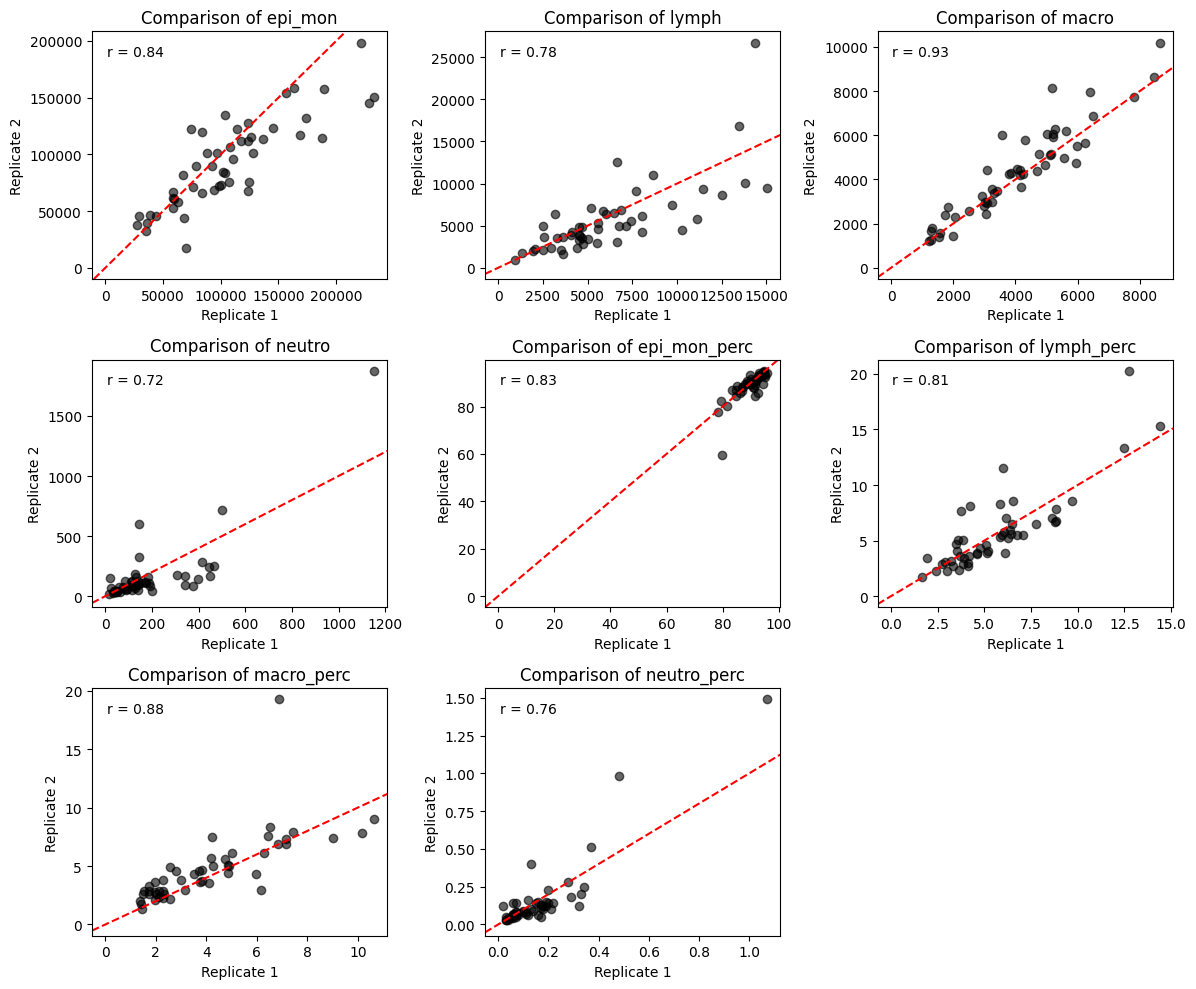

In [79]:
df = pd.read_csv("rescan_monusac_counts.csv")


replicate_1_df = df[df['sample'].str.endswith('_1')]
replicate_2_df = df[df['sample'].str.endswith('_2')]

df['base_sample'] = df['sample'].str.extract(r'(s_\d+)_\d+')

print(df.head())

features = ["epi_mon","lymph","macro","neutro","epi_mon_perc","lymph_perc","macro_perc","neutro_perc"]


from scipy.stats import spearmanr

plt.figure(figsize=(12, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    
    replicate_1_values = []
    replicate_2_values = []
    
    for base_sample, group in df.groupby('base_sample'):
        if len(group) == 2:
            replicate_1_value = group[group['sample'].str.endswith('_1')][feature].values[0]
            replicate_2_value = group[group['sample'].str.endswith('_2')][feature].values[0]
            
            replicate_1_values.append(replicate_1_value)
            replicate_2_values.append(replicate_2_value)
            
            plt.scatter(replicate_1_value, replicate_2_value, color='black', alpha=0.6, label='Replicate 1' if i == 1 else "")
    
    if len(replicate_1_values) > 1 and len(replicate_2_values) > 1:
        correlation, _ = spearmanr(replicate_1_values, replicate_2_values)
        plt.text(0.05, 0.9, f'r = {correlation:.2f}', transform=plt.gca().transAxes, fontsize=10)

    plt.title(f'Comparison of {feature}')
    plt.xlabel('Replicate 1')
    plt.ylabel('Replicate 2')
    plt.axline((0, 0), (1, 1), color='r', linestyle='--', label='y=x')

plt.tight_layout()
plt.show()


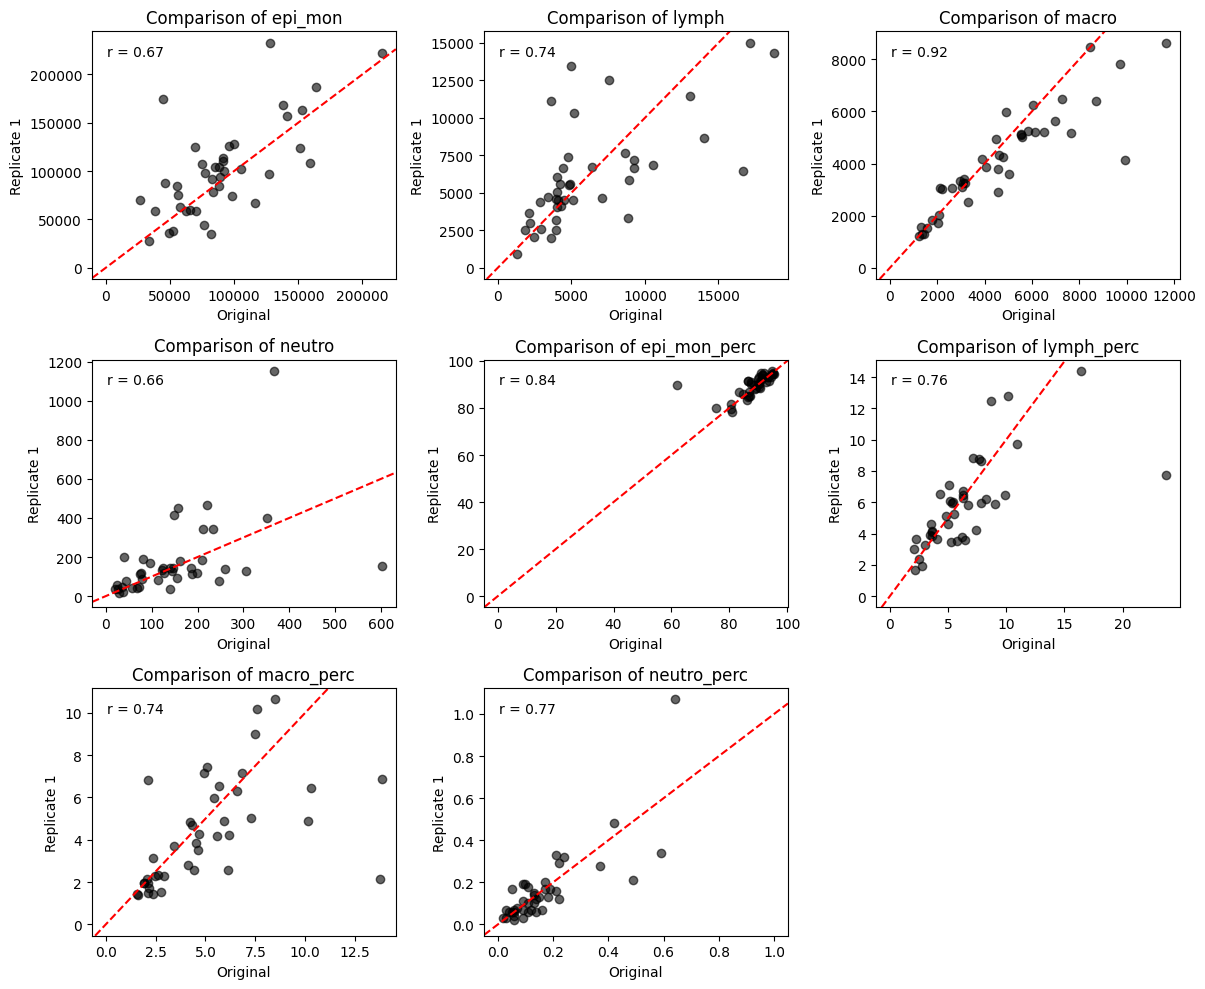

In [80]:
sample_names = df['base_sample'].unique()
orig_df = pd.read_csv("../../inputs/variance_input_df.csv")
subset_orig_df = orig_df[orig_df['sid'].isin(sample_names)]

subset_orig_df = subset_orig_df.rename(columns={'sid': 'sample'})

subset_orig_df = subset_orig_df.sort_values(by="sample")
replicate_1_df = replicate_1_df.sort_values(by="sample")

replicate_1_df['sample'] = replicate_1_df['sample'].str.replace('_1', '')


joined_df = pd.merge(subset_orig_df, replicate_1_df, on='sample', suffixes=('_df1', '_df2'))
#print(joined_df.head())

features = ["epi_mon","lymph","macro","neutro","epi_mon_perc","lymph_perc","macro_perc","neutro_perc"]

plt.figure(figsize=(12, 10))


for i, feature in enumerate(features, 1):
    feature1 = feature + "_df1"
    feature2 = feature + "_df2"
    plt.subplot(3, 3, i)
    plt.scatter(joined_df[feature1], joined_df[feature2], color='black', alpha=0.6)  
    correlation, _ = spearmanr(joined_df[feature1], joined_df[feature2])
    plt.text(0.05, 0.9, f'r = {correlation:.2f}', transform=plt.gca().transAxes, fontsize=10)

    plt.title(f'Comparison of {feature}')
    plt.xlabel('Original')
    plt.ylabel('Replicate 1')
    plt.axline((0, 0), (1, 1), color='r', linestyle='--', label='y=x')
    

plt.tight_layout()
plt.show()
    


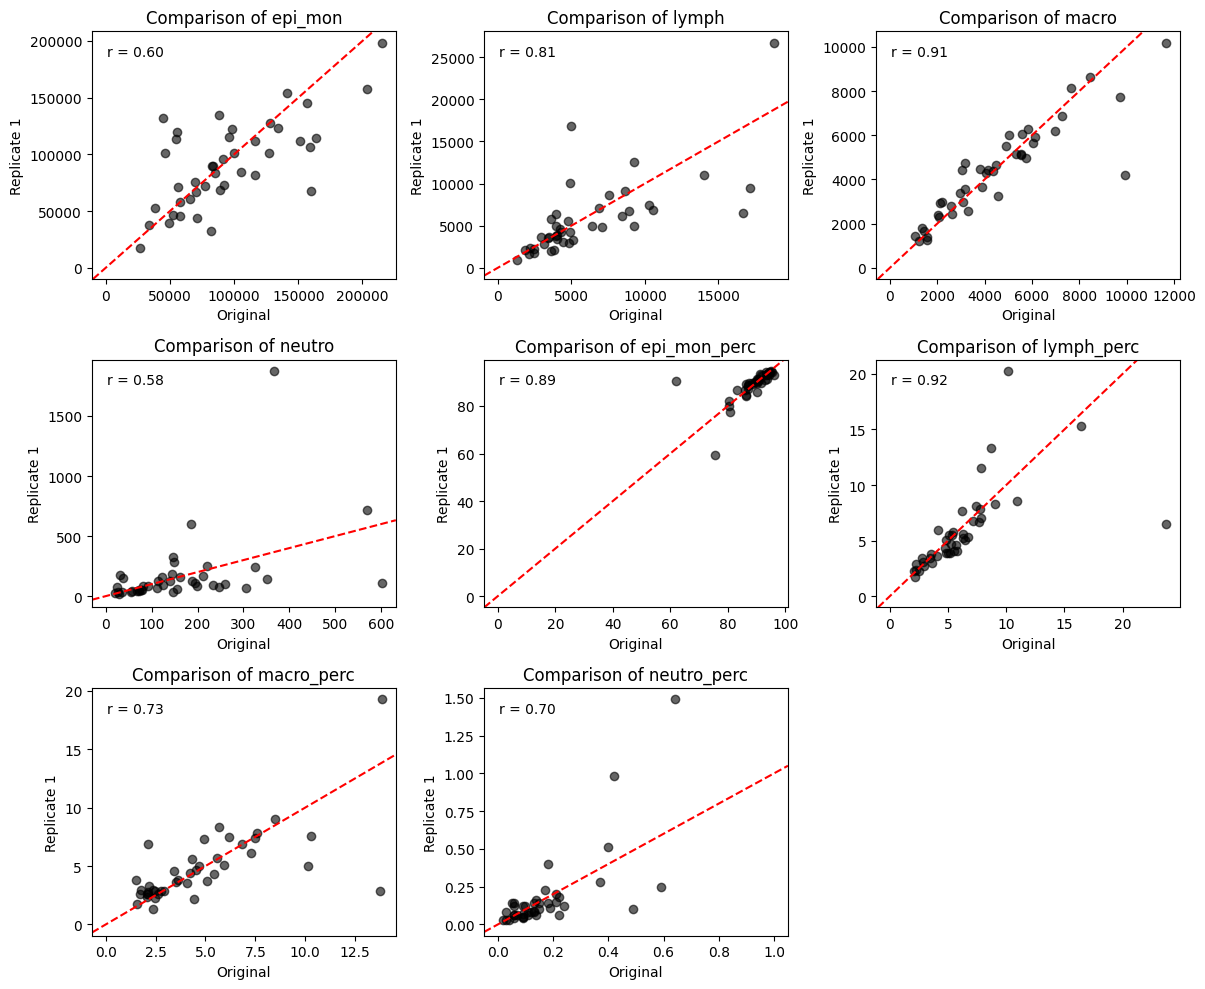

In [81]:
sample_names = df['base_sample'].unique()
orig_df = pd.read_csv("../../inputs/variance_input_df.csv")
subset_orig_df = orig_df[orig_df['sid'].isin(sample_names)]

subset_orig_df = subset_orig_df.rename(columns={'sid': 'sample'})

subset_orig_df = subset_orig_df.sort_values(by="sample")
replicate_2_df = replicate_2_df.sort_values(by="sample")

replicate_2_df['sample'] = replicate_2_df['sample'].str.replace('_2', '')


joined_df = pd.merge(subset_orig_df, replicate_2_df, on='sample', suffixes=('_df1', '_df2'))
#print(joined_df.head())

features = ["epi_mon","lymph","macro","neutro","epi_mon_perc","lymph_perc","macro_perc","neutro_perc"]

plt.figure(figsize=(12, 10))


for i, feature in enumerate(features, 1):
    feature1 = feature + "_df1"
    feature2 = feature + "_df2"
    plt.subplot(3, 3, i)
    plt.scatter(joined_df[feature1], joined_df[feature2], color='black', alpha=0.6)  
    correlation, _ = spearmanr(joined_df[feature1], joined_df[feature2])
    plt.text(0.05, 0.9, f'r = {correlation:.2f}', transform=plt.gca().transAxes, fontsize=10)

    plt.title(f'Comparison of {feature}')
    plt.xlabel('Original')
    plt.ylabel('Replicate 1')
    plt.axline((0, 0), (1, 1), color='r', linestyle='--', label='y=x')
    

plt.tight_layout()
plt.show()
    


   sample  epi_pan_neo  inflam  connective  dead  epi_pan_non_neo  \
0  s_10_1       168799     826      131028   320             3144   
1  s_10_2       166358     668      112716   310             2630   
2  s_11_1       244140    2645      303519   631            10211   
3  s_11_2       240399    1697      223166   409             5601   
4  s_12_1       180099    5662      371361  1178             7192   

   epi_pan_perc  inflam_perc  connective_perc  dead_perc base_sample  
0       56.5384       0.2716          43.0847     0.1052        s_10  
1       59.7802       0.2363          39.8738     0.1097        s_10  
2       45.3271       0.4714          54.0891     0.1124        s_11  
3       52.1992       0.3601          47.3540     0.0868        s_11  
4       33.1200       1.0013          65.6704     0.2083        s_12  


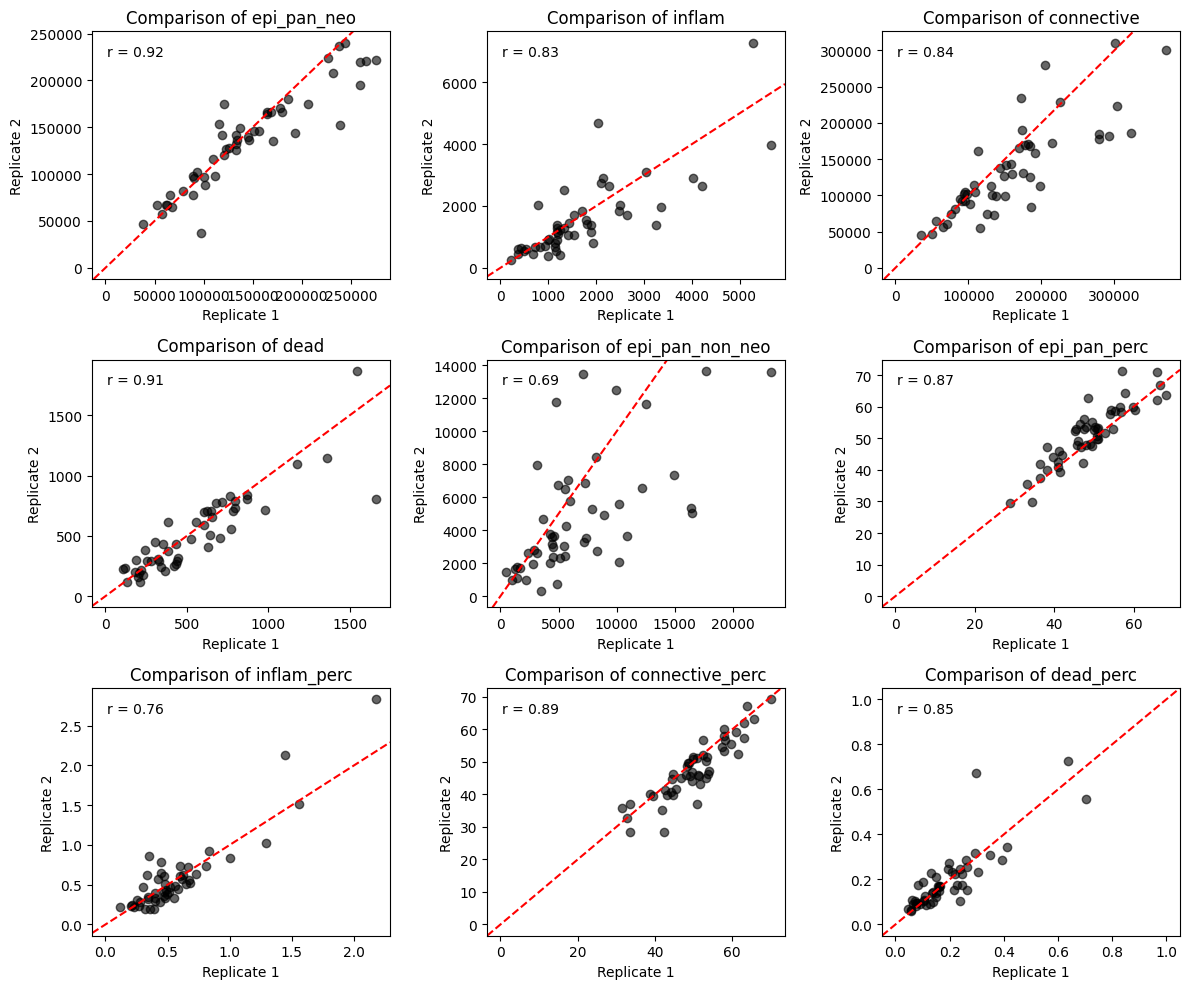

In [73]:
df = pd.read_csv("rescan_pannuke_counts.csv")

df['base_sample'] = df['sample'].str.extract(r'(s_\d+)_\d+')
replicate_1_df = df[df['sample'].str.endswith('_1')]
replicate_2_df = df[df['sample'].str.endswith('_2')]



print(df.head())

features = ["epi_pan_neo","inflam","connective","dead","epi_pan_non_neo","epi_pan_perc","inflam_perc","connective_perc","dead_perc"]


from scipy.stats import spearmanr

plt.figure(figsize=(12, 10))
colors = {'_1': 'orange', '_2': 'green'}


for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    
    replicate_1_values = []
    replicate_2_values = []
    
    for base_sample, group in df.groupby('base_sample'):
        if len(group) == 2:
            replicate_1_value = group[group['sample'].str.endswith('_1')][feature].values[0]
            replicate_2_value = group[group['sample'].str.endswith('_2')][feature].values[0]
            
            replicate_1_values.append(replicate_1_value)
            replicate_2_values.append(replicate_2_value)
            
            plt.scatter(replicate_1_value, replicate_2_value, alpha=0.6, color="black", label='Replicate 1' if i == 1 else "")
    
    if len(replicate_1_values) > 1 and len(replicate_2_values) > 1:
        correlation, _ = spearmanr(replicate_1_values, replicate_2_values)
        plt.text(0.05, 0.9, f'r = {correlation:.2f}', transform=plt.gca().transAxes, fontsize=10)

    plt.title(f'Comparison of {feature}')
    plt.xlabel('Replicate 1')
    plt.ylabel('Replicate 2')
    plt.axline((0, 0), (1, 1), color='r', linestyle='--', label='y=x')

plt.tight_layout()
plt.show()


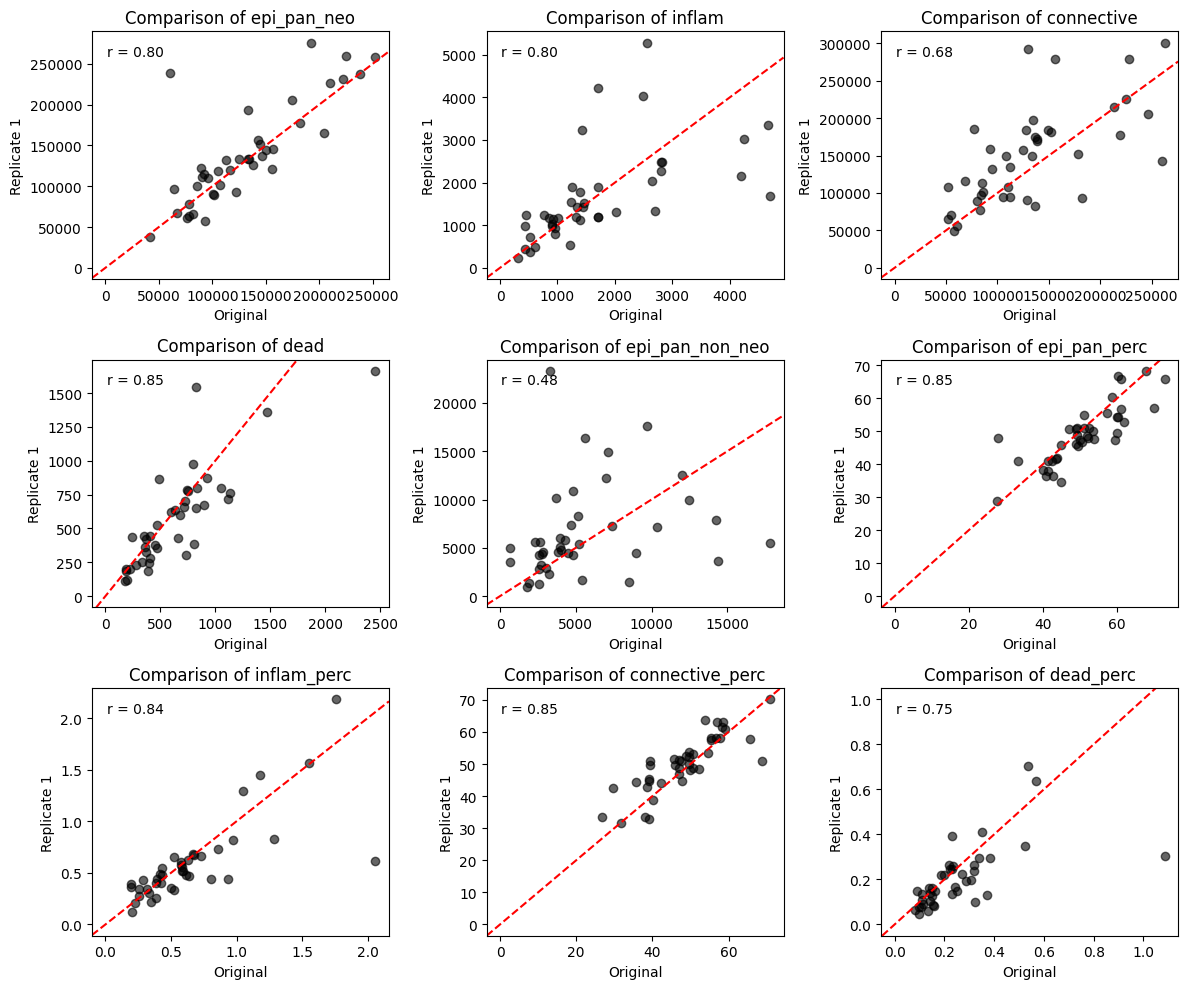

In [74]:
sample_names = df['base_sample'].unique()
orig_df = pd.read_csv("../../inputs/variance_input_df.csv")
subset_orig_df = orig_df[orig_df['sid'].isin(sample_names)]

subset_orig_df = subset_orig_df.rename(columns={'sid': 'sample'})

subset_orig_df = subset_orig_df.sort_values(by="sample")
replicate_1_df = replicate_1_df.sort_values(by="sample")

replicate_1_df['sample'] = replicate_1_df['sample'].str.replace('_1', '')


joined_df = pd.merge(subset_orig_df, replicate_1_df, on='sample', suffixes=('_df1', '_df2'))
#print(joined_df.head())

features = ["epi_pan_neo","inflam","connective","dead","epi_pan_non_neo","epi_pan_perc","inflam_perc","connective_perc","dead_perc"]

plt.figure(figsize=(12, 10))


for i, feature in enumerate(features, 1):
    feature1 = feature + "_df1"
    feature2 = feature + "_df2"
    plt.subplot(3, 3, i)
    plt.scatter(joined_df[feature1], joined_df[feature2], color='black', alpha=0.6)  
    correlation, _ = spearmanr(joined_df[feature1], joined_df[feature2])
    plt.text(0.05, 0.9, f'r = {correlation:.2f}', transform=plt.gca().transAxes, fontsize=10)

    plt.title(f'Comparison of {feature}')
    plt.xlabel('Original')
    plt.ylabel('Replicate 1')
    plt.axline((0, 0), (1, 1), color='r', linestyle='--', label='y=x')
    

plt.tight_layout()
plt.show()
    


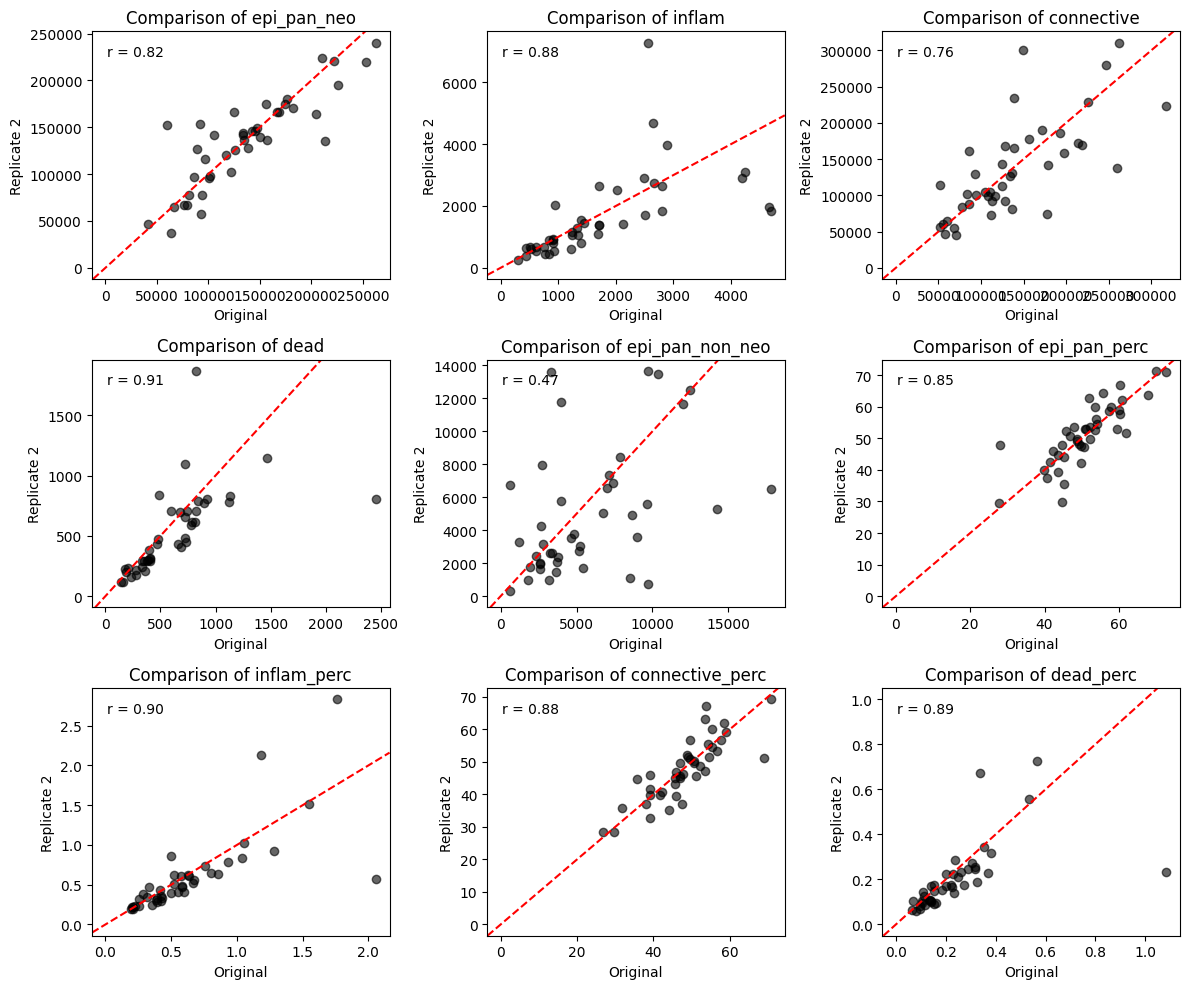

In [76]:
sample_names = df['base_sample'].unique()
orig_df = pd.read_csv("../../inputs/variance_input_df.csv")
subset_orig_df = orig_df[orig_df['sid'].isin(sample_names)]

subset_orig_df = subset_orig_df.rename(columns={'sid': 'sample'})

subset_orig_df = subset_orig_df.sort_values(by="sample")
replicate_2_df = replicate_2_df.sort_values(by="sample")

replicate_2_df['sample'] = replicate_2_df['sample'].str.replace('_2', '')


joined_df = pd.merge(subset_orig_df, replicate_2_df, on='sample', suffixes=('_df1', '_df2'))
#print(joined_df.head())

features = ["epi_pan_neo","inflam","connective","dead","epi_pan_non_neo","epi_pan_perc","inflam_perc","connective_perc","dead_perc"]

plt.figure(figsize=(12, 10))


for i, feature in enumerate(features, 1):
    feature1 = feature + "_df1"
    feature2 = feature + "_df2"
    plt.subplot(3, 3, i)
    plt.scatter(joined_df[feature1], joined_df[feature2], color='black', alpha=0.6)  
    correlation, _ = spearmanr(joined_df[feature1], joined_df[feature2])
    plt.text(0.05, 0.9, f'r = {correlation:.2f}', transform=plt.gca().transAxes, fontsize=10)

    plt.title(f'Comparison of {feature}')
    plt.xlabel('Original')
    plt.ylabel('Replicate 2')
    plt.axline((0, 0), (1, 1), color='r', linestyle='--', label='y=x')
    

plt.tight_layout()
plt.show()
    


In [1]:

import pandas as pd
import pingouin as pg
data = pd.read_csv("../../rescan_images/rescan_all_features.csv")



variables = data.columns


icc_results_list = []

for var in variables:
    if "sample" in var or "source" in var:
        continue

    try:
        df_icc = data.pivot_table(index='sample', columns='source', values=var).reset_index()
        

        df_long = df_icc.melt(id_vars=['sample'], var_name='rater', value_name='value')
        

        df_long = df_long.dropna(subset=['value'])
        

        icc = pg.intraclass_corr(data=df_long, targets='sample', raters='rater', ratings='value')
        
        icc_row = icc.loc[icc['Type'] == 'ICC2']
        
        if not icc_row.empty:
            icc_value = icc_row['ICC'].values[0]
            f_value = icc_row['F'].values[0]
            df1 = icc_row['df1'].values[0]
            df2 = icc_row['df2'].values[0]
            pval = icc_row['pval'].values[0]
            ci95 = icc_row['CI95%'].values[0]
            icc_type = icc_row['Type'].values[0]
        else:
            icc_value = f_value = df1 = df2 = pval = ci95 = icc_type = None
        
        icc_results_list.append({
            'Variable': var,
            'Type': icc_type,
            'ICC': icc_value,
            'F': f_value,
            'df1': df1,
            'df2': df2,
            'pval': pval,
            'CI95%': ci95
        })
    except Exception as e:
        print(f"An error occurred while processing variable '{var}': {e}")
        continue

icc_results = pd.DataFrame(icc_results_list)

print(icc_results)


                       Variable  Type       ICC          F  df1  df2  \
0                       neo_epi  ICC2  0.843599  17.723856   49   98   
1                        inflam  ICC2  0.682806   7.436522   49   98   
2                          conn  ICC2  0.702769   8.932476   49   98   
3                          dead  ICC2  0.663728   6.956661   49   98   
4                   non_neo_epi  ICC2  0.337526   2.672837   49   98   
..                          ...   ...       ...        ...  ...  ...   
56                          7_4  ICC2  0.815946  14.312259   49   98   
57            7_cv_voronoi_area  ICC2  0.168644   1.601220   49   98   
58  7_delaunay_edge_length_mean  ICC2  0.724682   8.967497   49   98   
59   7_delaunay_edge_length_std  ICC2  0.736764   9.393528   49   98   
60          7_shannon_div_index  ICC2  0.665323   6.909468   49   98   

            pval         CI95%  
0   1.152750e-31   [0.76, 0.9]  
1   2.788759e-17  [0.55, 0.79]  
2   4.705596e-20  [0.57, 0.81]  
3  

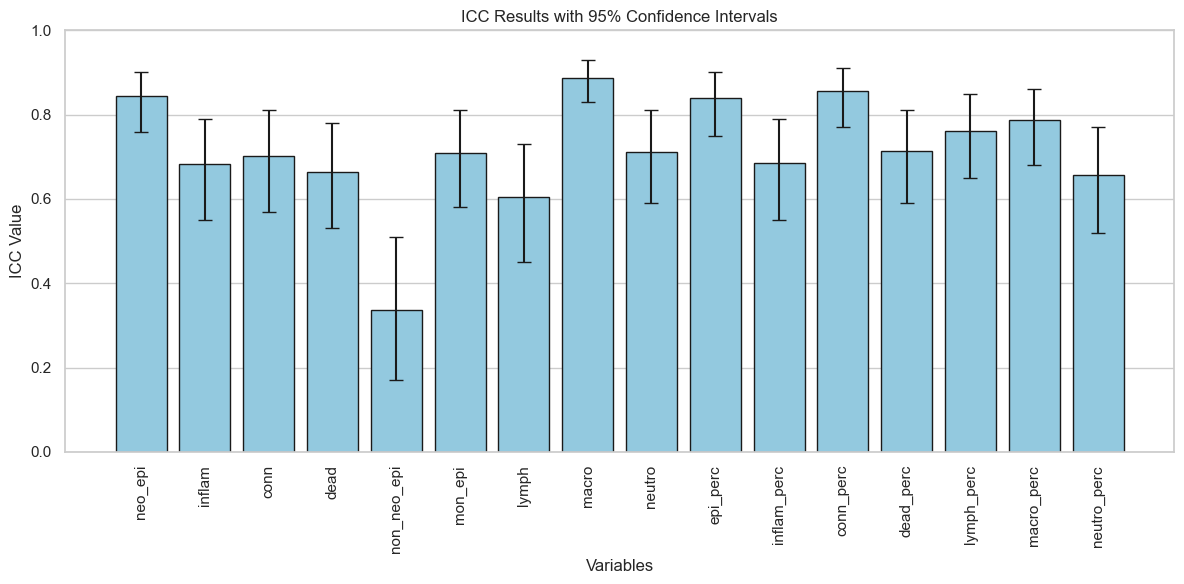

In [10]:
import seaborn as sns 
import matplotlib.pyplot as plt

icc_results['CI_lower'] = icc_results['CI95%'].apply(lambda x: x[0])
icc_results['CI_upper'] = icc_results['CI95%'].apply(lambda x: x[1])

icc_results['Error_lower'] = icc_results['ICC'] - icc_results['CI_lower']
icc_results['Error_upper'] = icc_results['CI_upper'] - icc_results['ICC']


sns.set(style='whitegrid')


plt.figure(figsize=(12, 6))


ax = sns.barplot(
    x='Variable',
    y='ICC',
    data=icc_results,
    color='skyblue',
    edgecolor='k',
    ci=None 
)


ax.errorbar(
    x=range(len(icc_results)),
    y=icc_results['ICC'],
    yerr=[icc_results['Error_lower'].values, icc_results['Error_upper'].values],
    fmt='none', 
    ecolor='k', 
    capsize=5
)


plt.xticks(rotation=90)
plt.xlabel('Variables')
plt.ylabel('ICC Value')
plt.title('ICC Results with 95% Confidence Intervals')
plt.ylim(0, 1)
plt.tight_layout()


plt.show()

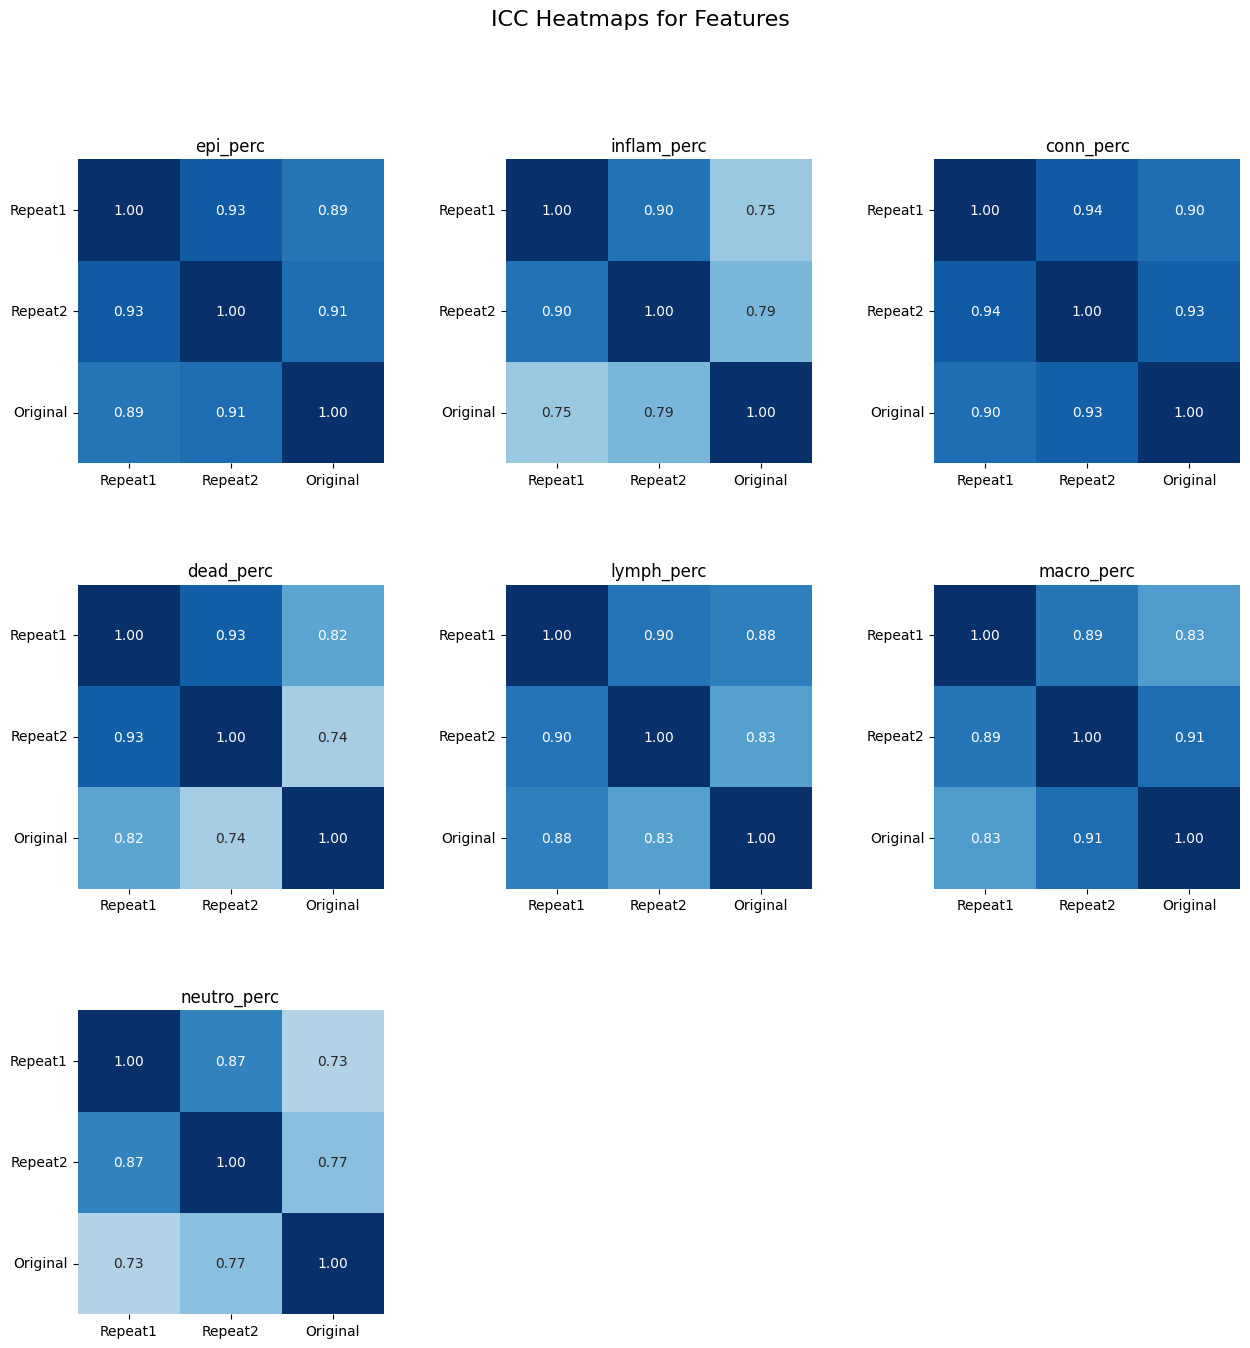

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pingouin import intraclass_corr

data = pd.read_csv("../../rescan_images/rescan_combined_counts.csv")
perc_features = [col for col in data.columns if '_perc' in col]

icc_results = {}



num_features = len(perc_features)
ncols = 3
nrows = (num_features // ncols) + int(num_features % ncols > 0) 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))
fig.suptitle('ICC Heatmaps for Features', fontsize=16)


axes = axes.flatten()

for idx, feature in enumerate(perc_features):
    icc_data = data[['sample', feature, 'source']]
    
    labels = ['Repeat1', 'Repeat2', 'Original']
    icc_matrix = pd.DataFrame(index=labels, columns=labels)

    for i, rater1 in enumerate(labels):
        for j, rater2 in enumerate(labels):
            if i == j:
                icc_matrix.loc[rater1, rater2] = 1.0
            else:
                pair_data = icc_data[icc_data['source'].isin([rater1, rater2])]
                pairwise_icc = intraclass_corr(data=pair_data, targets='sample', raters='source', ratings=feature)
                icc_value = pairwise_icc.loc[pairwise_icc['Type'] == 'ICC1k', 'ICC'].values[0]
                icc_matrix.loc[rater1, rater2] = icc_value


    icc_matrix = icc_matrix.astype(float)


    sns.heatmap(icc_matrix, annot=True, fmt=".2f", cmap='Blues', vmin=0.6, vmax=1, ax=axes[idx], cbar=False)
    axes[idx].set_title(f'{feature}')
    axes[idx].tick_params(axis='x', rotation=0)
    axes[idx].tick_params(axis='y', rotation=0)


for ax in axes[num_features:]:
    ax.set_visible(False)


plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

In [1]:
import pingouin
print(pingouin.__version__)

0.5.5


C:\Users\m139105\AppData\Local\Temp\ipykernel_40832\4083870292.py:116: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = patches.Rectangle(


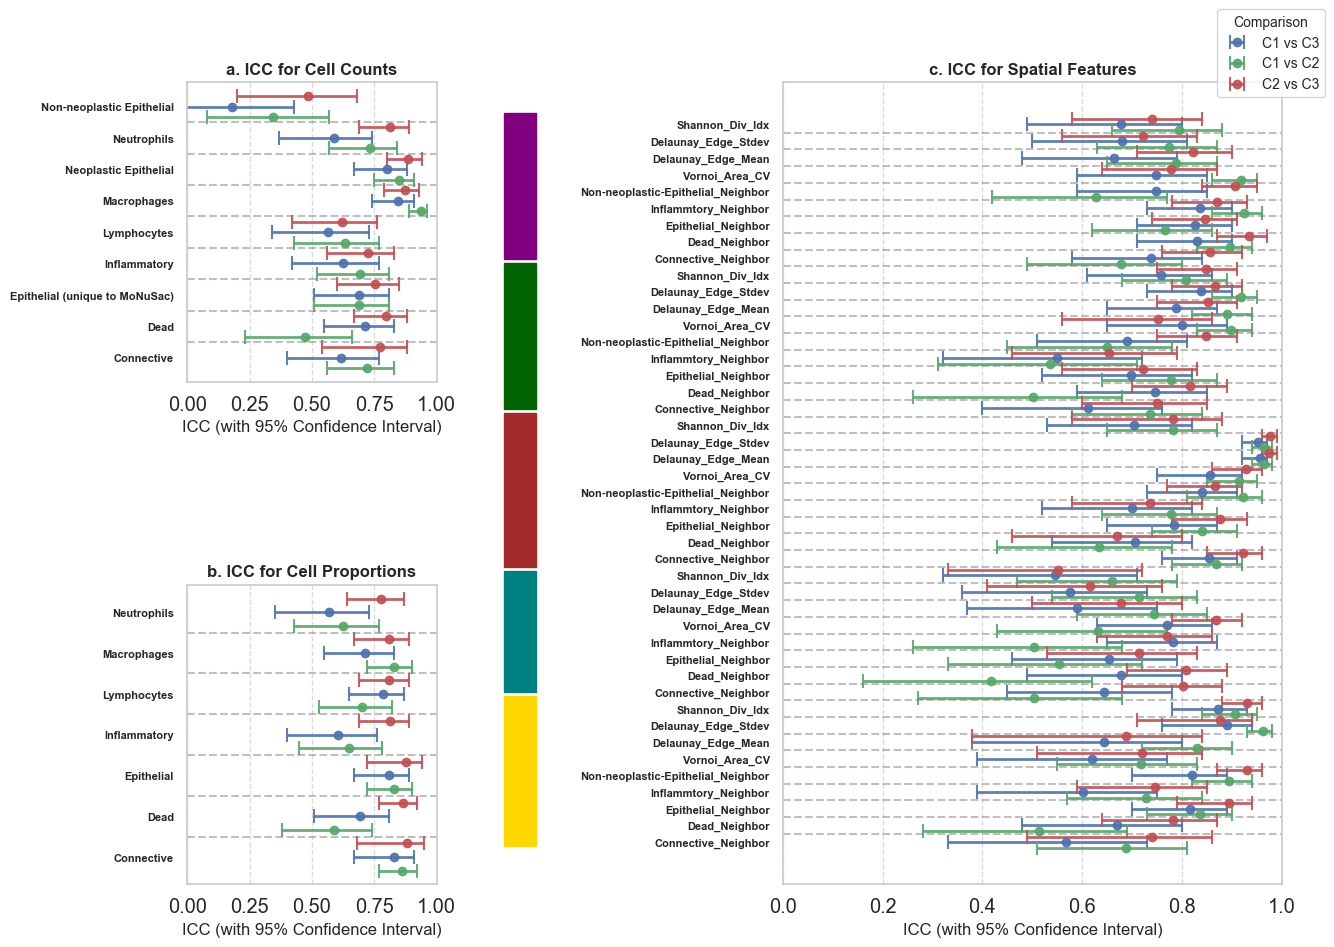

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pingouin import intraclass_corr
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches


def process_df_icc(file_path):
    

    df = pd.read_csv(file_path)


    sns.set_theme(style="whitegrid", font_scale=1.3, rc={"axes.titlesize": 18, "axes.labelsize": 14})

    features = df.columns.difference(['Sample', 'Source'])

    icc_results = []

    # Define the pairs for ICC calculation
    pairs = [('C1', 'C3'), ('C1', 'C2'), ('C2', 'C3')]

    # Compute ICC for each feature
    for feature in features:
        feature_data = df[['Source', feature]]
        for (rater1, rater2) in pairs:
            data_subset = feature_data[feature_data['Source'].isin([rater1, rater2])]
            feature_data_long = pd.DataFrame({
                'study': np.repeat(np.arange(len(data_subset)//2), 2),
                'Source': data_subset['Source'],
                'value': data_subset[feature]
            })
            #print(feature_data_long.head)
            icc = intraclass_corr(data=feature_data_long, targets='study', raters='Source', ratings='value')
            icc_2k = icc[icc['Type'] == 'ICC2'][['Type', 'ICC', 'CI95%']]
            icc_2k['Feature'] = feature
            icc_2k['Comparison'] = f"{rater1} vs {rater2}"

            # Extract confidence intervals
            ci_low, ci_high = icc_2k['CI95%'].values[0]
            icc_2k['CI_lower'] = ci_low
            icc_2k['CI_upper'] = ci_high

            icc_results.append(icc_2k)

    icc_df = pd.concat(icc_results, ignore_index=True)

    return icc_df


sns.set_theme(style="whitegrid", font_scale=1.3, rc={"axes.titlesize": 18, "axes.labelsize": 14})

def plot_icc(ax, df_subset, title):
    df_subset['Feature_pos'] = df_subset.groupby('Feature').ngroup()
    df_subset['Comparison_pos'] = df_subset.groupby(['Feature', 'Comparison']).ngroup()
    
    

    pair_palette = {
        'C1 vs C3': '#4C72B0',
        'C1 vs C2': '#55A868',
        'C2 vs C3': '#C44E52'
    }

    for comparison, color in pair_palette.items():
        subset = df_subset[df_subset['Comparison'] == comparison]
        ax.errorbar(
            y=subset['Comparison_pos'],
            x=subset['ICC'],
            xerr=[subset['ICC'] - subset['CI_lower'], subset['CI_upper'] - subset['ICC']],
            fmt='o',
            color=color,
            label=comparison,
            elinewidth=2,
            capsize=5,
            capthick=1.5,
            alpha=0.9
        )

    y_positions = df_subset['Comparison_pos'].unique()
    feature_names = df_subset.drop_duplicates(subset=['Feature'], keep='first')['Feature'].tolist()

    if "Spatial" in title:
        spatial_labels = pd.read_csv("../../rescan_images/spatial_feature_labels_map.csv")
        label_mapping = dict(zip(spatial_labels["orig"], spatial_labels["new"]))
        orig_y_ticks = list(label_mapping.keys())  
        new_y_ticks = [label_mapping.get(label, label) for label in feature_names]
        feature_names = new_y_ticks


    yticks_labels = [feature_names[i // 3] if i % 3 == 0 else "" for i in range(len(y_positions))]

    ax.set_yticks(y_positions)
    ax.set_yticklabels(yticks_labels, fontsize=8, fontweight="bold")
    ax.set_xlabel('ICC (with 95% Confidence Interval)', fontsize=12)
    ax.set_xlim(0, 1)
    ax.set_title(title, fontsize=12, weight='bold')

    ax.grid(axis='x', linestyle='--', alpha=0.7)
    ax.grid(axis='y', visible=False)
    for idx in range(3, len(y_positions), 3):
        ax.axhline(y=idx - 0.5, linestyle='--', color='gray', alpha=0.5)

def add_patch_rect(y_start,y_end,color):
    y_start, y_end = y_start, y_end
    ax3_ymin, ax3_ymax = ax3.get_ylim()
    patch_y_start = (y_start - ax3_ymin) / (ax3_ymax - ax3_ymin)
    patch_y_end = (y_end - ax3_ymin) / (ax3_ymax - ax3_ymin)


    ax3_pos = ax3.get_position()
    patch_x = ax3_pos.x0 - 0.04

    rect = patches.Rectangle(
        xy=(patch_x, patch_y_start),
        width=0.02,
        height=patch_y_end - patch_y_start,  
        transform=fig.transFigure, 
        color=color, clip_on=False , edgecolor='black'
    )
    return rect


fig = plt.figure(figsize=(16, 12))
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 2])

file_path = '../../rescan_images/rescan_all_features.csv'
icc1_df = process_df_icc(file_path)
ax1 = plt.subplot(gs[0, 0])
plot_icc(ax1, icc1_df, 'a. ICC for Cell Counts')

file_path = '../../rescan_images/rescan_perc_features.csv'
icc2_df = process_df_icc(file_path)
ax2 = plt.subplot(gs[1, 0])
plot_icc(ax2, icc2_df, 'b. ICC for Cell Proportions')

file_path = '../../rescan_images/rescan_spatial_features.csv'
icc3_df = process_df_icc(file_path)
ax3 = plt.subplot(gs[:, 1]) 
plot_icc(ax3, icc3_df, 'c. ICC for Spatial Features')
ax3.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1), title='Comparison', title_fontsize=10, fontsize=10)

df_concat = pd.concat([icc1_df, icc2_df, icc3_df], axis=0, ignore_index=True)

df_concat.to_csv("icc_results.csv", index=False)

# Add patch to the figure (not the axis)
conn_rect = add_patch_rect(20, 38, "gold")
dead_rect = add_patch_rect(38.5, 53, "teal")
epi_rect = add_patch_rect(53.5, 72, "brown")
inflam_rect = add_patch_rect(72.5, 90, "darkgreen")
macro_rec = add_patch_rect(90.5, 108, "purple")

fig.patches.append(conn_rect)
fig.patches.append(dead_rect)
fig.patches.append(epi_rect)
fig.patches.append(inflam_rect)
fig.patches.append(macro_rec)

plt.tight_layout(pad=6.0)
plt.savefig("icc_figure.png", dpi=600)



plt.show()

0.894463978 0.8 0.94
0.833618056 0.7 0.91
   Neoplastic Epithelial  Inflammatory  Connective  Dead  \
0                 185984          8056      152314  1340   
1                 182444          6103      157244  1069   
2                 187198          8128      169710  1384   
3                 182619          3763      109570   373   
4                 182562          3957      116346   302   

   Non-neoplastic Epithelial  Epithelial (unique to MoNuSac)  Lymphocytes  \
0                       2210                            6345           80   
1                       2667                            6551           62   
2                       2618                            6385           90   
3                       1062                            5537           72   
4                        950                            6110           74   

   Macrophages  Neutrophils  
0         2345            8  
1         2874           12  
2         2187           11  
3         1826

C:\Users\m139105\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


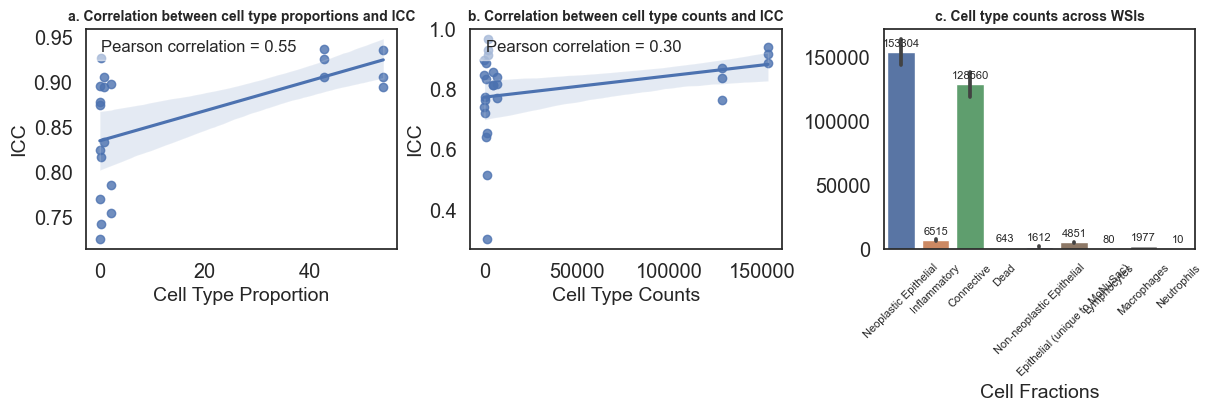

In [137]:
import seaborn as sns
import scipy.stats as stats
import numpy as np
df = pd.read_csv("icc_values.csv")
filtered_df = df[df['celltype'].str.contains('perc', na=False)]
sns.set_style("white")
corr, _ = stats.pearsonr(filtered_df["proportion"], filtered_df["ICC"])



print(np.median(filtered_df["ICC"]), np.median(filtered_df["lowCI"]), np.median(filtered_df["highCI"]))


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), constrained_layout=True)
g = sns.regplot(x="proportion", y="ICC", data=filtered_df, ax=axes[0])

ax = axes[0]
axes[0].annotate(f'Pearson correlation = {corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction',
            fontsize=12, ha='left', va='top', bbox=dict(facecolor='white', alpha=0.5))
axes[0].set_xlabel("Cell Type Proportion")
axes[0].set_title("a. Correlation between cell type proportions and ICC", fontsize=10, fontweight="bold")

filtered_df = df[~df['celltype'].str.contains('perc', na=False)]


print(np.median(filtered_df["ICC"]), np.median(filtered_df["lowCI"]), np.median(filtered_df["highCI"]))

sns.set_style("white")
corr, _ = stats.pearsonr(filtered_df["proportion"], filtered_df["ICC"])

g = sns.regplot(x="proportion", y="ICC", data=filtered_df, ax=axes[1])

ax = axes[1]
axes[1].annotate(f'Pearson correlation = {corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction',
            fontsize=12, ha='left', va='top', bbox=dict(facecolor='white', alpha=0.5))
axes[1].set_xlabel("Cell Type Counts")
axes[1].set_title("b. Correlation between cell type counts and ICC",  fontsize=10, fontweight="bold")

df = pd.read_csv("../../rescan_images/rescan_all_features.csv")
count_columns = df[df.columns[1:10]]

print(count_columns.head())

sns.barplot(data=count_columns, ax=axes[2])
axes[2].set_xticklabels(labels=count_columns.columns,rotation=45, fontsize=8)
axes[2].set_xlabel("Cell Fractions")
axes[2].set_title("c. Cell type counts across WSIs", fontsize=10, fontweight="bold")
for container in axes[2].containers:
    axes[2].bar_label(container, fmt='%.0f', label_type='edge', padding=3, fontsize=8)  # padding adds space from the bar

plt.show()


In [83]:
! pip install statannot

C:\Users\m139105\AppData\Local\Temp\ipykernel_27296\2510381454.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_yticklabels(labels=["0.0", "0.2", "0.4", "0.6", "0.8", "1.0"], fontsize=14, fontweight="bold")


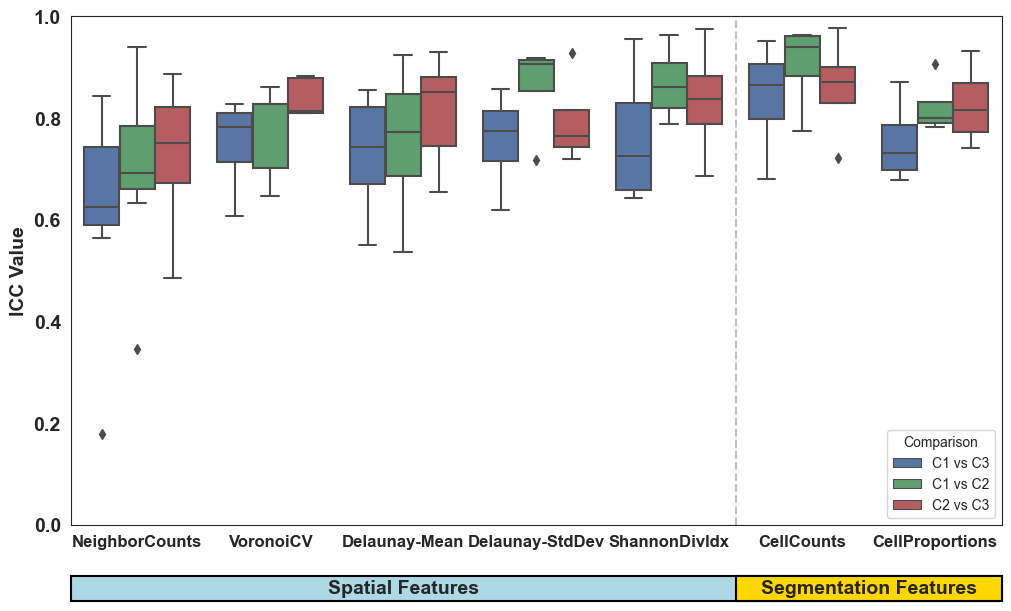

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from statannot import add_stat_annotation

plt.clf()   
plt.close()
import matplotlib.patches as patches
from scipy.stats import ttest_ind
from itertools import combinations
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6), constrained_layout=True)
df = pd.read_csv("icc_results.csv")
df = df[~df['Feature'].str.contains('Dead', na=False)]
df = df[~df['Feature'].str.contains('Neutro', na=False)]

pair_palette = {
        'C1 vs C3': '#4C72B0',
        'C1 vs C2': '#55A868',
        'C2 vs C3': '#C44E52'
    }

sns.set_style("white")
sns.boxplot(x='FeatureType', y='ICC', hue="Comparison", data=df, ax=axes, palette=pair_palette)
axes.set_xticklabels(labels=["NeighborCounts","VoronoiCV", "Delaunay-Mean", "Delaunay-StdDev", "ShannonDivIdx", "CellCounts", "CellProportions"], fontsize=12, fontweight="bold")
axes.set_xlabel("")

rect1 = patches.Rectangle(( -0.5, -0.15), 7, 0.05, linewidth=1.5, edgecolor='black', facecolor='lightblue',
                          transform=axes.get_xaxis_transform(), clip_on=False)
axes.add_patch(rect1)
axes.text(2, -0.125, 'Spatial Features', ha='center', va='center', fontsize=14, fontweight='bold', transform=axes.get_xaxis_transform())
axes.axvline(x=4.5, linestyle='--', color='gray', alpha=0.5)
axes.set_ylim(0, 1)
#axes.set_xlabel(fontsize)

# Box 2: For Type B group (B1, B2, B3)
rect2 = patches.Rectangle(( 4.5, -0.15), 2, 0.05, linewidth=1.5, edgecolor='black', facecolor='gold',
                          transform=axes.get_xaxis_transform(), clip_on=False)
axes.add_patch(rect2)
axes.text(5.5, -0.125, 'Segmentation Features', ha='center', va='center', fontsize=14, fontweight='bold', transform=axes.get_xaxis_transform())
axes.set_ylabel("ICC Value", fontsize=14, fontweight="bold")
axes.set_yticklabels(labels=["0.0", "0.2", "0.4", "0.6", "0.8", "1.0"], fontsize=14, fontweight="bold")

'''
axes[0].set_xticklabels(labels=["NeighborCounts","VoronoiCV", "Delaunay-EdgeLenMean", "Delaunay-EdgeLenStdDev", "ShannonDiversityIdx", "CellCounts", "CellProportions"], fontsize=10)
axes[0].set_xlabel("")
axes[0].set_title("d. ICC Values between cross sections stratified by type", fontsize=16, fontweight="bold")

rect1 = patches.Rectangle(( -0.5, -0.5), 7, 0.05, linewidth=1.5, edgecolor='black', facecolor='lightblue',
                          transform=axes[0].get_xaxis_transform(), clip_on=False)
axes[0].add_patch(rect1)
axes[0].text(2, -0.4, 'Spatial Features', ha='center', va='center', fontsize=14, fontweight='bold', transform=axes[0].get_xaxis_transform())
axes[0].axvline(x=4.5, linestyle='--', color='gray', alpha=0.5)
axes[0].set_ylim(0, 1)

# Box 2: For Type B group (B1, B2, B3)
rect2 = patches.Rectangle(( 4.5, -0.5), 2, 0.05, linewidth=1.5, edgecolor='black', facecolor='gold',
                          transform=axes[0].get_xaxis_transform(), clip_on=False)
axes[0].add_patch(rect2)
axes[0].text(5.5, -0.4, 'Segmentation Features', ha='center', va='center', fontsize=14, fontweight='bold', transform=axes[0].get_xaxis_transform())

import matplotlib.pyplot as plt

def stratified_cluster_bootstrap(data, comparison_column="Comparison", value_column="ICC", n_iterations=10000):
    unique_comparisons = data[comparison_column].unique()
    boot_means = {comp: [] for comp in unique_comparisons}
    
    for _ in range(n_iterations):
        boot_sample = data.groupby(comparison_column).sample(frac=1, replace=True)
        for comp in unique_comparisons:
            boot_means[comp].append(boot_sample[boot_sample[comparison_column] == comp][value_column].mean())

    return boot_means

boot_means = stratified_cluster_bootstrap(df)

boot_df = pd.DataFrame(boot_means)

for comp in boot_df.columns:
    sorted_values = np.sort(boot_df[comp])  # Sort for smooth plotting
    density, bins = np.histogram(sorted_values, bins=50, density=True)
    bin_centers = (bins[:-1] + bins[1:]) / 2  # Get bin centers for plotting
    axes[1].plot(bin_centers, density, label=comp, linewidth=2, color=pair_palette[comp])

axes[1].set_xlabel("Bootstrapped Mean ICC")
axes[1].set_ylabel("Density")
axes[1].set_title("e. Bootstrapped distributions of ICC by cross-section", fontsize=16, fontweight="bold")
axes[1].legend()

boot_ci = boot_df.quantile([0.025, 0.975])
boot_ci

p_values = {}
for g1, g2 in combinations(boot_df.columns, 2):
    diff = boot_df[g1] - boot_df[g2]
    p_val = 2 * min(np.mean(diff < 0), np.mean(diff > 0))
    p_values[f"{g1} vs {g2}"] = p_val
    print(diff, g1, g2)


legend_labels = []
for comp in boot_df.columns:
    p_val_str = ""
    for other_comp in boot_df.columns:
        if comp == other_comp:
            continue
        key1 = f"{comp} vs {other_comp}"
        key2 = f"{other_comp} vs {comp}"
        if key1 in p_values:
            p_val_str = f" (p = {p_values[key1]:.4f})"
            break
        elif key2 in p_values:
            p_val_str = f" (p = {p_values[key2]:.4f})"
            break
    legend_labels.append(f"{comp}{p_val_str}")


for line, label in zip(axes[1].get_lines(), legend_labels):
    line.set_label(label)

boot_ci = boot_df.quantile([0.025, 0.975])
print("Bootstrapped 95% Confidence Intervals:")
print(boot_ci)
print("\nBootstrapped p-values:")
for k, v in p_values.items():
    print(f"{k}: p = {v:.4f}")


feature_column = "Feature"
feature_pvals = {}

for feature in df[feature_column].unique():
    print(feature)
    feature_df = df[df[feature_column] == feature]
    boot_means = stratified_cluster_bootstrap(feature_df)

    boot_df = pd.DataFrame(boot_means)
    
    for g1, g2 in combinations(boot_df.columns, 2):
        diff = boot_df[g1] - boot_df[g2]
        p_val = 2 * min(np.mean(diff < 0), np.mean(diff > 0))
        feature_pvals[f"{feature}::{g1} vs {g2}"] = p_val

significant_features = [k for k, v in feature_pvals.items() if v < 0.05]
percent_significant = len(significant_features) / len(feature_pvals) * 100

print(f"\nPercentage of feature comparisons with p < 0.05: {percent_significant:.2f}%")

significant_features = {k: v for k, v in feature_pvals.items() if v < 0.05}
insignificant_features = {k: v for k, v in feature_pvals.items() if v >= 0.05}

percent_significant = len(significant_features) / len(feature_pvals) * 100
percent_insignificant = 100 - percent_significant

print(f"\nPercentage of feature comparisons with p < 0.05: {percent_significant:.2f}%")
print(f"Percentage of feature comparisons with p ≥ 0.05: {percent_insignificant:.2f}%")

insig_pvals = list(insignificant_features.values())
if insig_pvals:
    print("\nSummary of p-values for insignificant feature comparisons (p ≥ 0.05):")
    print(f"  Count          : {len(insig_pvals)}")
    print(f"  Min p-value    : {min(insig_pvals):.4f}")
    print(f"  Max p-value    : {max(insig_pvals):.4f}")
    print(f"  Mean p-value   : {np.mean(insig_pvals):.4f}")
    print(f"  Median p-value : {np.median(insig_pvals):.4f}")
else:
    print("\nAll feature-level comparisons were significant (p < 0.05).")'''


plt.savefig("2CD.png", bbox_inches="tight", dpi=600)

In [8]:
print(insignificant_features)

{'Connective::C1 vs C3 vs C1 vs C2': 0.6234, 'Connective::C1 vs C3 vs C2 vs C3': 0.3764, 'Connective::C1 vs C2 vs C2 vs C3': 0.642, 'Lymphocytes::C1 vs C3 vs C1 vs C2': 0.7546, 'Lymphocytes::C1 vs C3 vs C2 vs C3': 0.625, 'Lymphocytes::C1 vs C2 vs C2 vs C3': 0.5072, 'Macrophages::C1 vs C3 vs C1 vs C2': 0.1332, 'Macrophages::C1 vs C3 vs C2 vs C3': 0.3842, 'Macrophages::C1 vs C2 vs C2 vs C3': 0.375}


In [6]:
df = pd.read_csv("icc_results.csv")
df = df[~df['Feature'].str.contains('Dead', na=False)]
df = df[~df['Feature'].str.contains('Neutro', na=False)]

pair_palette = {
        'C1 vs C3': '#4C72B0',
        'C1 vs C2': '#55A868',
        'C2 vs C3': '#C44E52'
    }

sns.set_style("white")
sns.boxplot(x='FeatureType', y='ICC', hue="Comparison", data=df, ax=axes[0], palette=pair_palette)
axes[0].set_xticklabels(labels=["NeighborCounts","VoronoiCV", "Delaunay-EdgeLenMean", "Delaunay-EdgeLenStdDev", "ShannonDiversityIdx", "CellCounts", "CellProportions"],rotation=45, fontsize=10)
axes[0].set_xlabel("")
axes[0].set_title("d. ICC Values between cross sections stratified by type", fontsize=16, fontweight="bold")

rect1 = patches.Rectangle(( -0.5, -0.5), 7, 0.05, linewidth=1.5, edgecolor='black', facecolor='lightblue',
                          transform=axes[0].get_xaxis_transform(), clip_on=False)
axes[0].add_patch(rect1)
axes[0].text(2, -0.4, 'Spatial Features', ha='center', va='center', fontsize=14, fontweight='bold', transform=axes[0].get_xaxis_transform())
axes[0].axvline(x=4.5, linestyle='--', color='gray', alpha=0.5)
axes[0].set_ylim(0, 1)

# Box 2: For Type B group (B1, B2, B3)
rect2 = patches.Rectangle(( 4.5, -0.5), 2, 0.05, linewidth=1.5, edgecolor='black', facecolor='gold',
                          transform=axes[0].get_xaxis_transform(), clip_on=False)
axes[0].add_patch(rect2)
axes[0].text(5.5, -0.4, 'Segmentation Features', ha='center', va='center', fontsize=14, fontweight='bold', transform=axes[0].get_xaxis_transform())


import matplotlib.pyplot as plt

def stratified_cluster_bootstrap(data, comparison_column="Comparison", value_column="ICC", n_iterations=10000):
    unique_comparisons = data[comparison_column].unique()
    boot_means = {comp: [] for comp in unique_comparisons}
    
    for _ in range(n_iterations):
        boot_sample = data.groupby(comparison_column).sample(frac=1, replace=True)
        for comp in unique_comparisons:
            boot_means[comp].append(boot_sample[boot_sample[comparison_column] == comp][value_column].mean())

    return boot_means

boot_means = stratified_cluster_bootstrap(df)

boot_df = pd.DataFrame(boot_means)

for comp in boot_df.columns:
    sorted_values = np.sort(boot_df[comp])  # Sort for smooth plotting
    density, bins = np.histogram(sorted_values, bins=50, density=True)
    bin_centers = (bins[:-1] + bins[1:]) / 2  # Get bin centers for plotting
    axes[1].plot(bin_centers, density, label=comp, linewidth=2, color=pair_palette[comp])

axes[1].set_xlabel("Bootstrapped Mean ICC")
axes[1].set_ylabel("Density")
axes[1].set_title("e. Bootstrapped distributions of ICC by cross-section", fontsize=16, fontweight="bold")
axes[1].legend()

boot_ci = boot_df.quantile([0.025, 0.975])

p_values = {}
mean_iccs = boot_df.mean()

print("Global Comparison Statistics:\n")
for g1, g2 in combinations(boot_df.columns, 2):
    diff = boot_df[g1] - boot_df[g2]
    p_val = 2 * min(np.mean(diff < 0), np.mean(diff > 0))
    mean_diff = mean_iccs[g1] - mean_iccs[g2]
    
    p_values[f"{g1} vs {g2}"] = {
        "Group 1 Mean": mean_iccs[g1],
        "Group 2 Mean": mean_iccs[g2],
        "Mean Difference": mean_diff,
        "p-value": p_val
    }

for k, stats in p_values.items():
    print(f"{k}:\n"
          f"  Group 1 Mean     = {stats['Group 1 Mean']:.4f}\n"
          f"  Group 2 Mean     = {stats['Group 2 Mean']:.4f}\n"
          f"  Mean Difference  = {stats['Mean Difference']:.4f}\n"
          f"  p-value          = {stats['p-value']:.4f}\n")

Global Comparison Statistics:

C1 vs C3 vs C1 vs C2:
  Group 1 Mean     = 0.7314
  Group 2 Mean     = 0.7909
  Mean Difference  = -0.0595
  p-value          = 0.0308

C1 vs C3 vs C2 vs C3:
  Group 1 Mean     = 0.7314
  Group 2 Mean     = 0.8119
  Mean Difference  = -0.0805
  p-value          = 0.0000

C1 vs C2 vs C2 vs C3:
  Group 1 Mean     = 0.7909
  Group 2 Mean     = 0.8119
  Mean Difference  = -0.0210
  p-value          = 0.3898



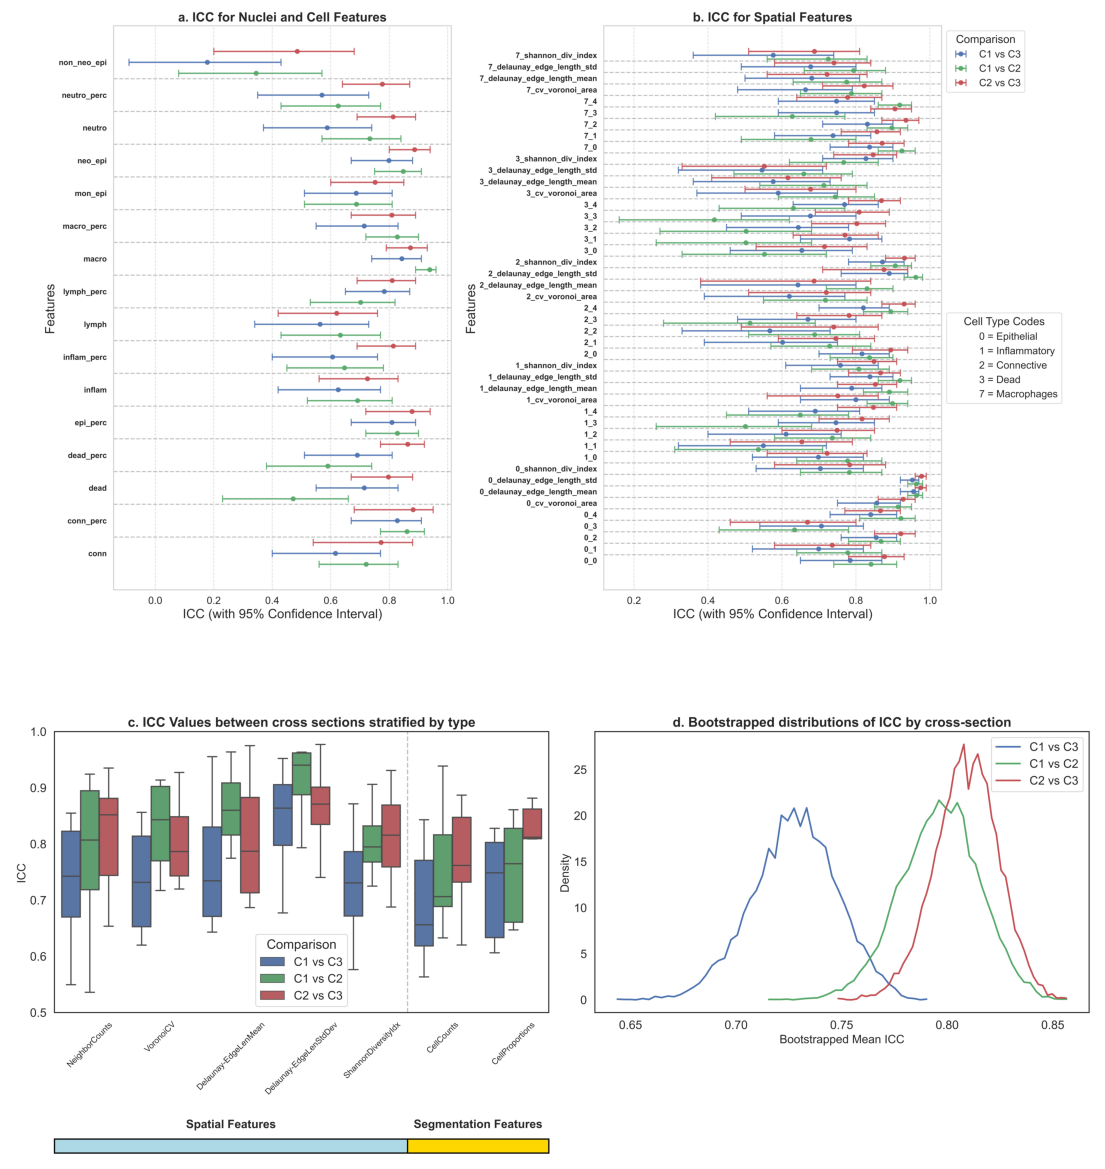

In [56]:
import matplotlib.pyplot as plt
from PIL import Image
path_to_png_1 = 'icc_2AB.png'
path_to_png_2 = '2CD.png'



image1 = Image.open(path_to_png_1)
image2 = Image.open(path_to_png_2)

fig, ax = plt.subplots(2, 1, figsize=(14, 16))


ax[0].imshow(image1)
ax[0].axis('off')

ax[1].imshow(image2)
ax[1].axis('off')
plt.subplots_adjust(hspace=0.01)  # Reduce vertical space (default is ~0.4)


In [40]:
def processdf(filename):
    df = pd.read_csv("../../rescan_images/voronoi/" + filename)
    df.columns = ["type", "area"]
    df['area'] = pd.to_numeric(df['area'], errors='coerce')

    Q1 = df['area'].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df['area'].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1                   # Interquartile range

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_no_outliers = df[(df['area'] >= lower_bound) & (df['area'] <= upper_bound)]
    return df_no_outliers

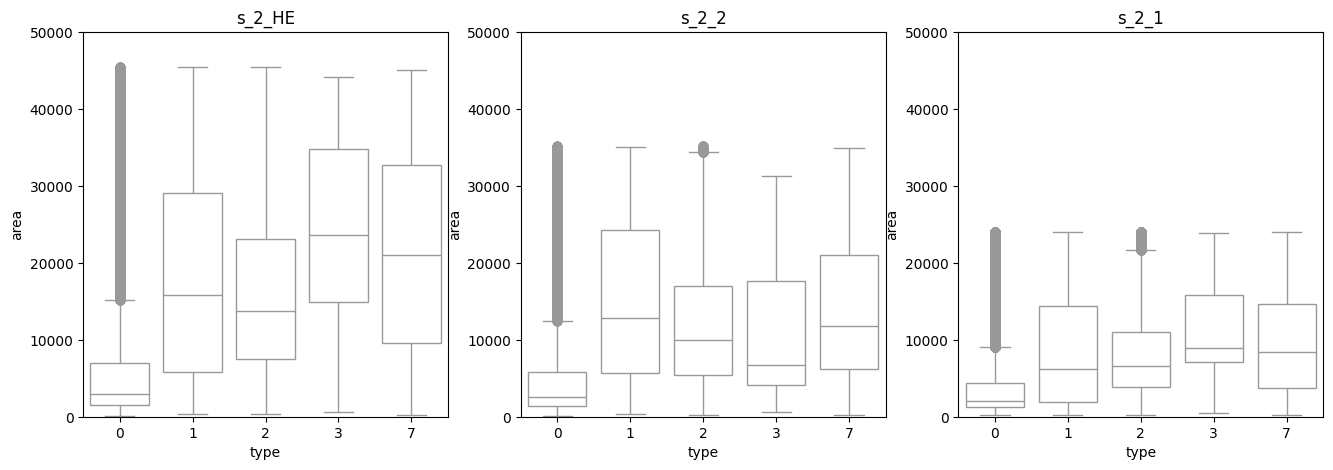

In [42]:
files = ["s_2_HE_results_voronoi_areas.csv","s_2_2_s_2_2_Urology_GU_s_2_2_Slide002_HE_36072_s_2_2_HE_151206_voronoi_areas.csv","s_2_1_s_2_1_Urology_GU_s_2_1_Slide001_HE_36072_s_2_1_HE_151029_voronoi_areas.csv"]
fig, ax = plt.subplots(1, 3, figsize=(16, 5))
counter = 0
for eachfile in files:
    df_no_outliers = processdf(eachfile)
    ax[counter].set_ylim(0,50000)
    ax[counter].set_title(eachfile.split("_")[0] + "_" + eachfile.split("_")[1] + "_" + eachfile.split("_")[2])
    sns.boxplot(data=df_no_outliers,x="type", y="area", color="white", ax=ax[counter])
    
    counter += 1
plt.show()

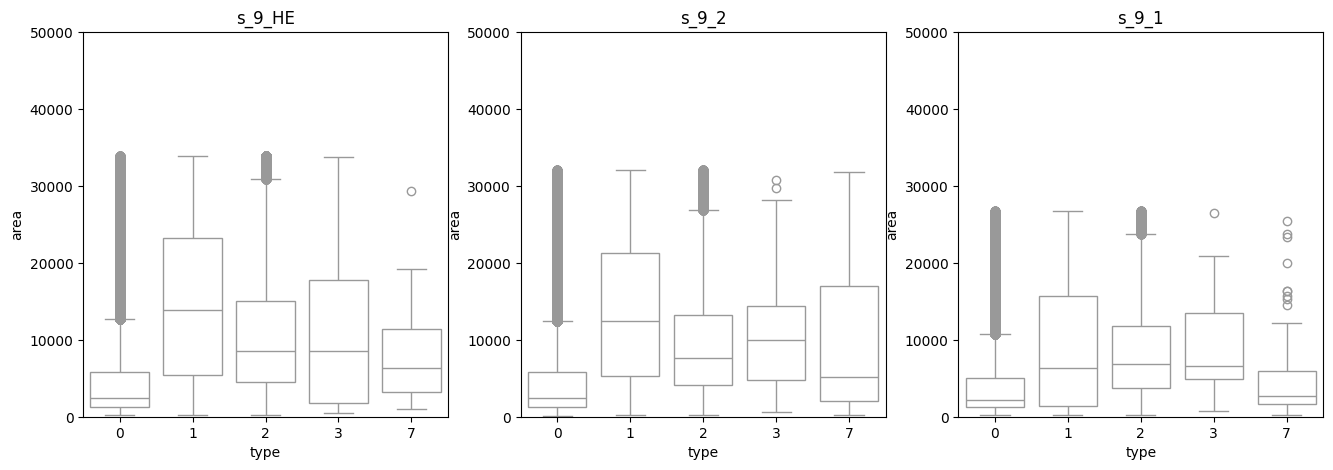

In [25]:
files = ["s_9_HE_results_voronoi_areas.csv","s_9_2_s_9_2_Urology_GU_s_9_2_Slide002_HE_36072_s_9_2_HE_152710_voronoi_areas.csv","s_9_1_s_9_1_Urology_GU_s_9_1_Slide001_HE_36072_s_9_1_HE_152547_voronoi_areas.csv"]
fig, ax = plt.subplots(1, 3, figsize=(16, 5))
counter = 0
for eachfile in files:
    df_no_outliers = processdf(eachfile)
    ax[counter].set_ylim(0,50000)
    ax[counter].set_title(eachfile.split("_")[0] + "_" + eachfile.split("_")[1] + "_" + eachfile.split("_")[2])
    sns.boxplot(data=df_no_outliers,x="type", y="area", color="white", ax=ax[counter])
    
    counter += 1
plt.show()

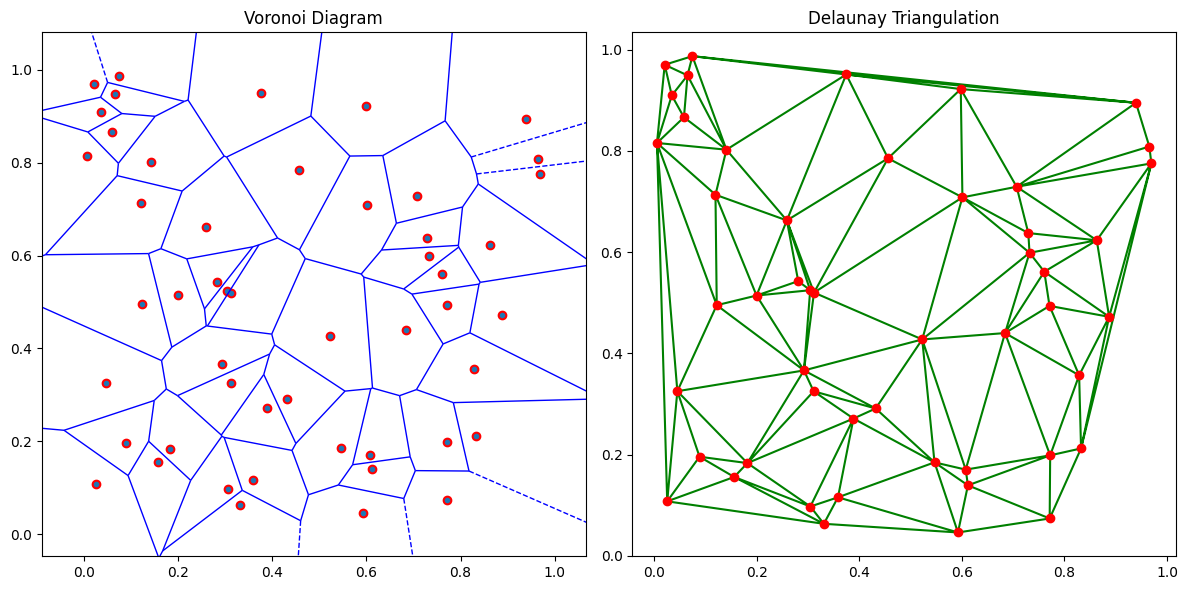

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d, Delaunay


np.random.seed(42)
points = np.random.rand(50, 2)
vor = Voronoi(points)
tri = Delaunay(points)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].set_title("Voronoi Diagram")
voronoi_plot_2d(vor, ax=axes[0], show_vertices=False, line_colors='blue')
axes[0].scatter(points[:, 0], points[:, 1], color='red')

axes[1].set_title("Delaunay Triangulation")
axes[1].triplot(points[:, 0], points[:, 1], tri.simplices, color='green')
axes[1].scatter(points[:, 0], points[:, 1], color='red')

plt.tight_layout()
plt.show()


In [22]:
df = pd.read_csv("dmd_metrics.csv")
df.head()

,Average Coverage,N50s
0,35.03,30464
1,37.73,25169
2,11.61,24227
3,22.18,11844
4,39.91,10380


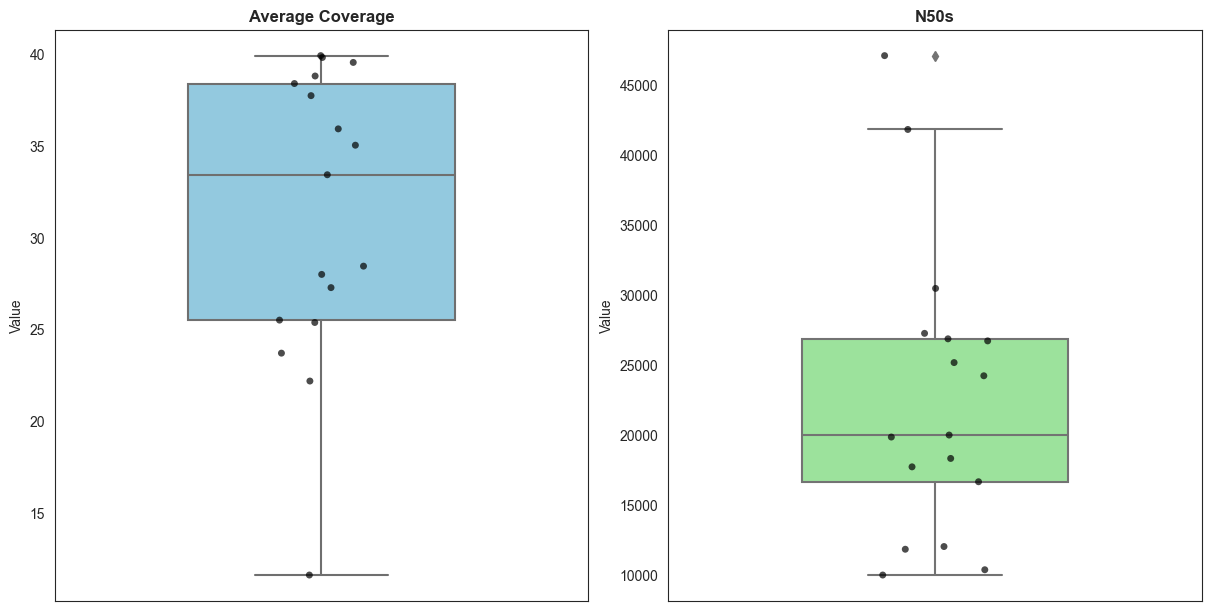

In [23]:
import seaborn as sns

import matplotlib.pyplot as plt

# Create a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)

# Boxplot with jitter for 'Average Coverage'
sns.boxplot(data=df, y='Average Coverage', ax=axes[0], color='skyblue', width=0.5)
sns.stripplot(data=df, y='Average Coverage', ax=axes[0], color='black', size=5, jitter=True, alpha=0.7)
axes[0].set_title('Average Coverage', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Value')
axes[0].set_xlabel('')

# Boxplot with jitter for 'N50s'
sns.boxplot(data=df, y='N50s', ax=axes[1], color='lightgreen', width=0.5)
sns.stripplot(data=df, y='N50s', ax=axes[1], color='black', size=5, jitter=True, alpha=0.7)
axes[1].set_title('N50s', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Value')
axes[1].set_xlabel('')

plt.show()

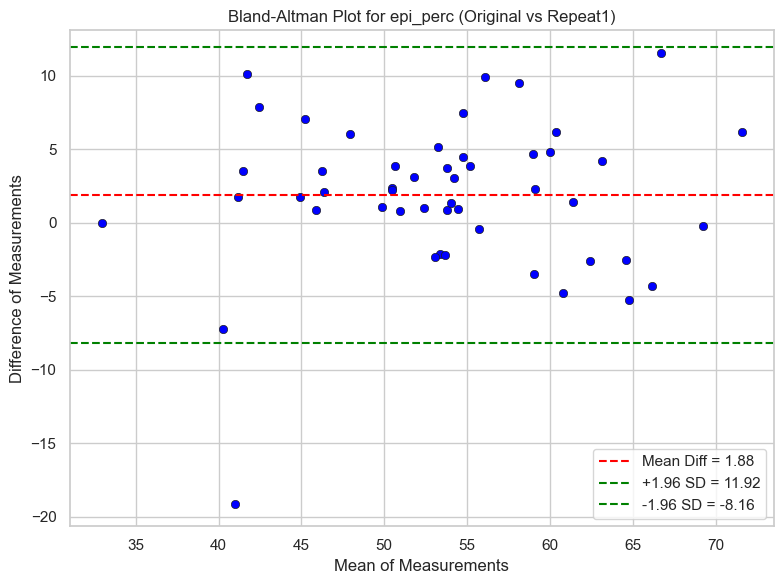

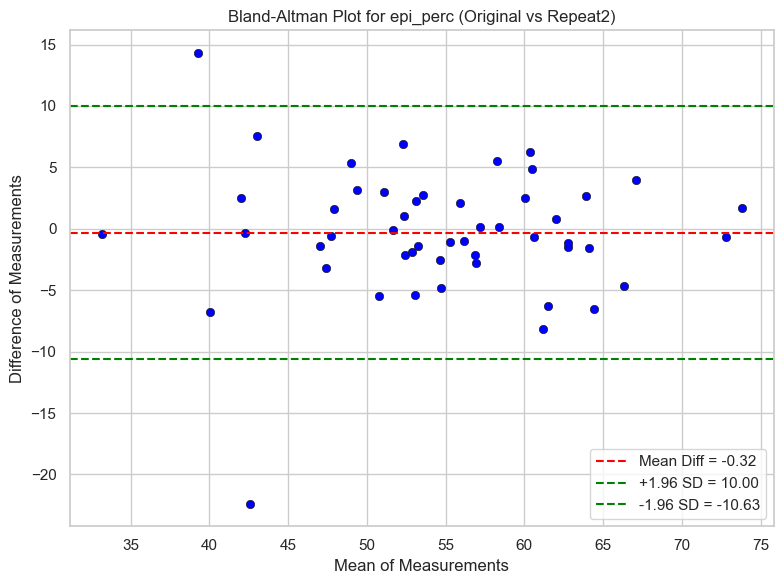

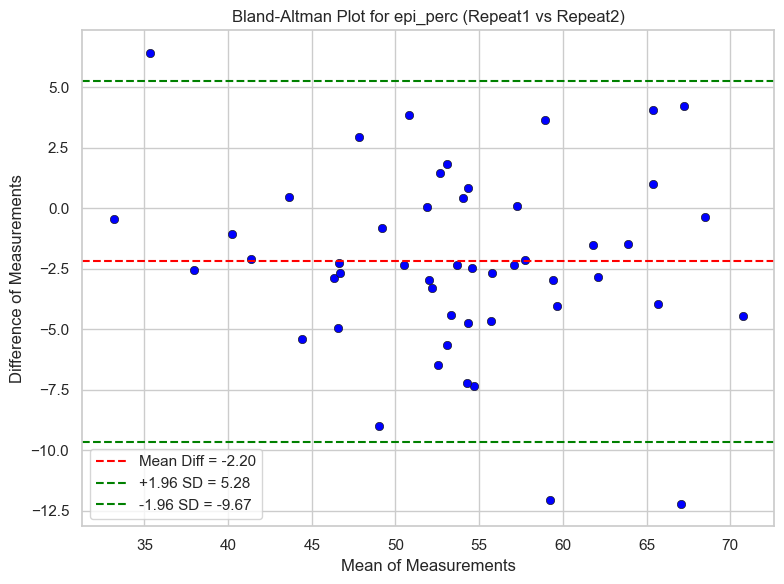

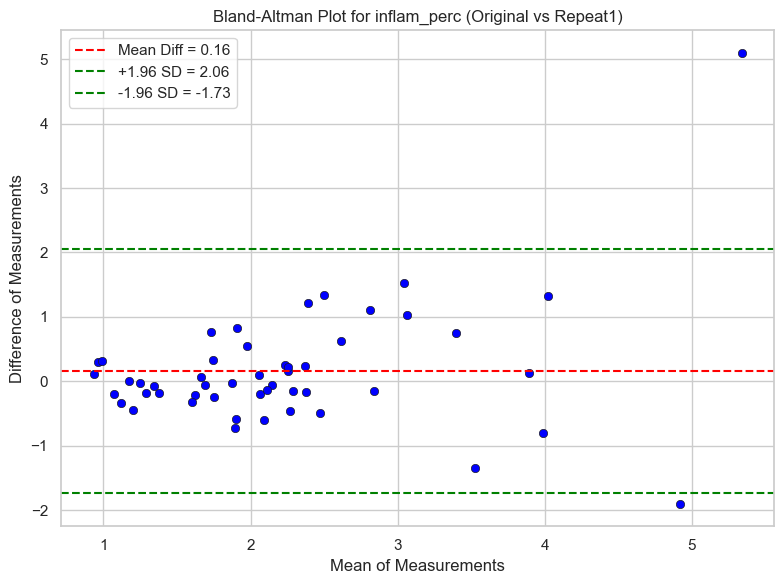

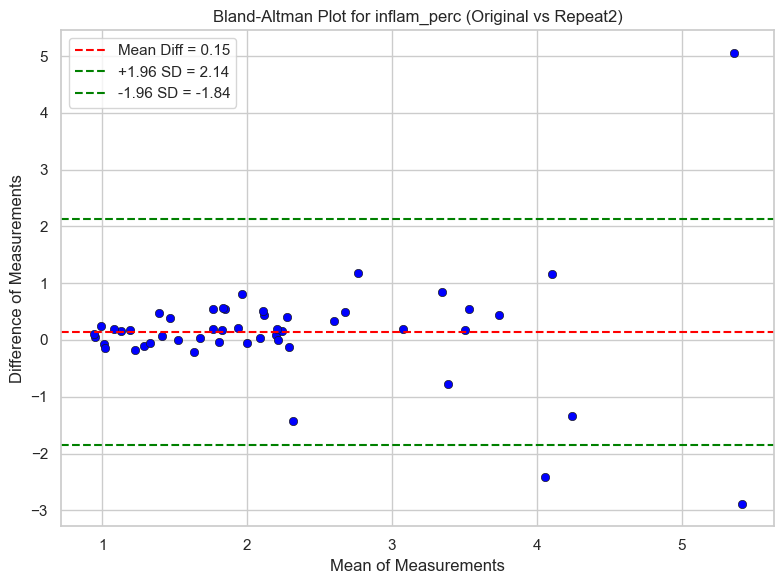

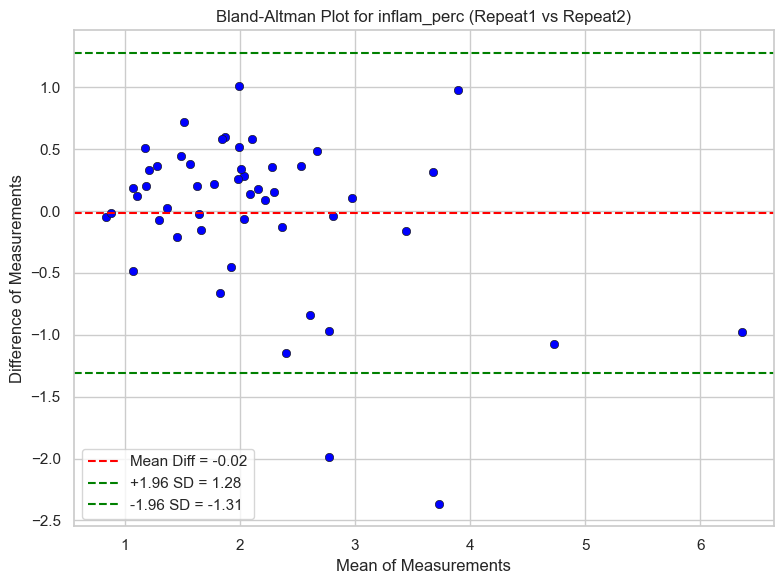

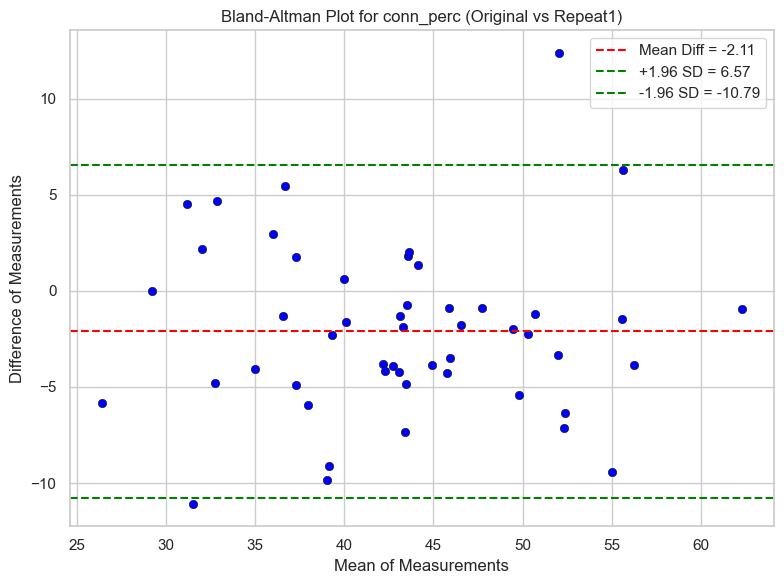

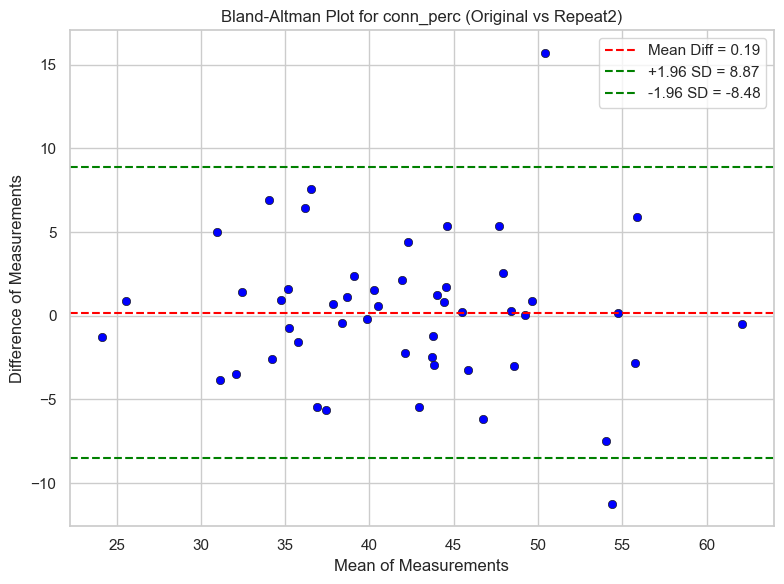

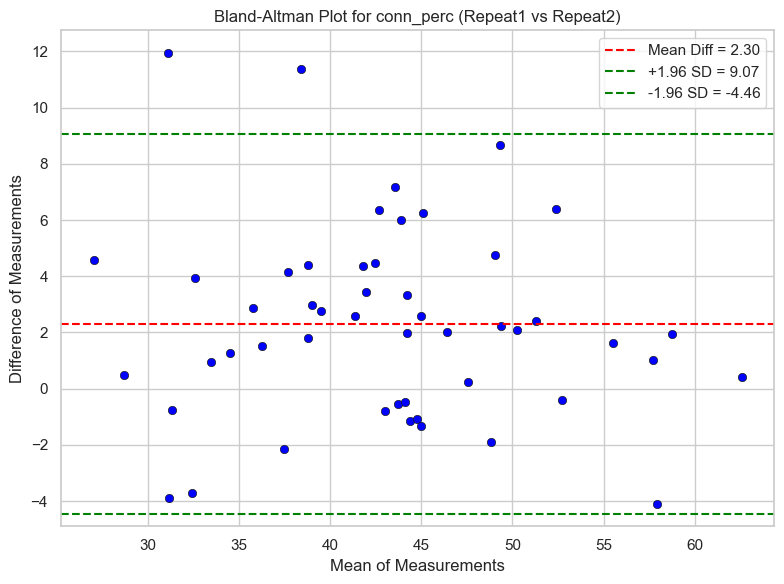

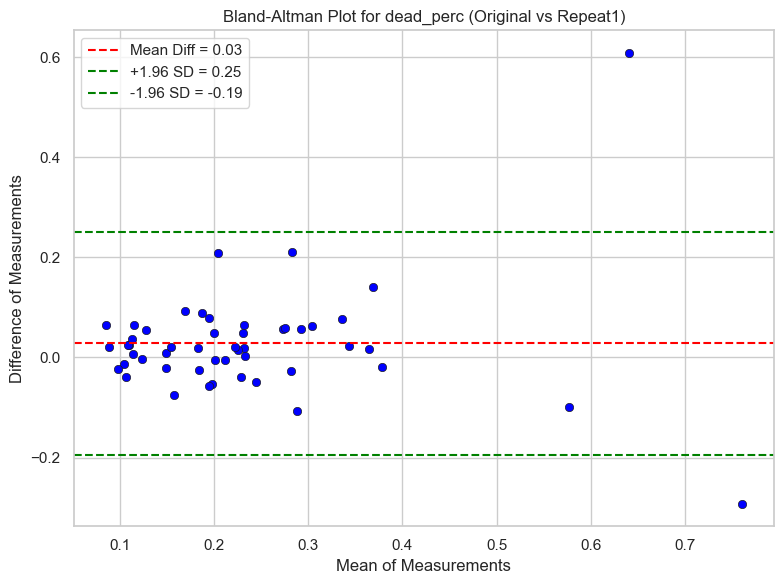

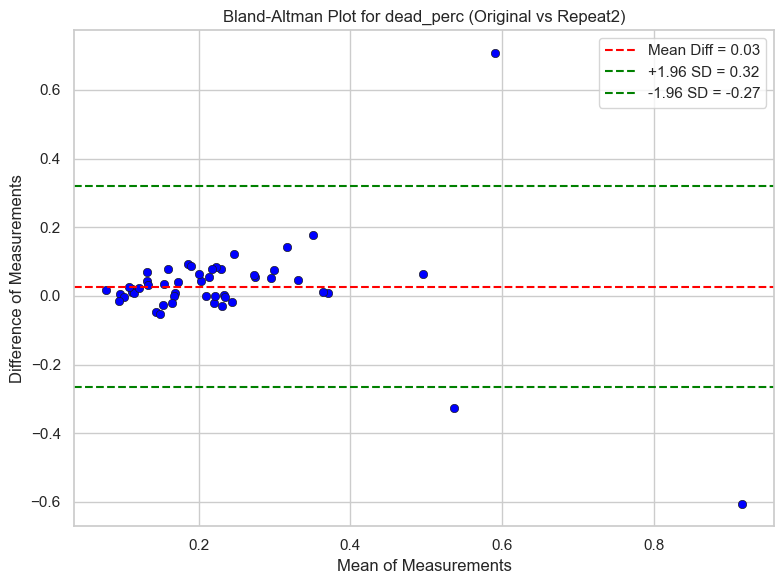

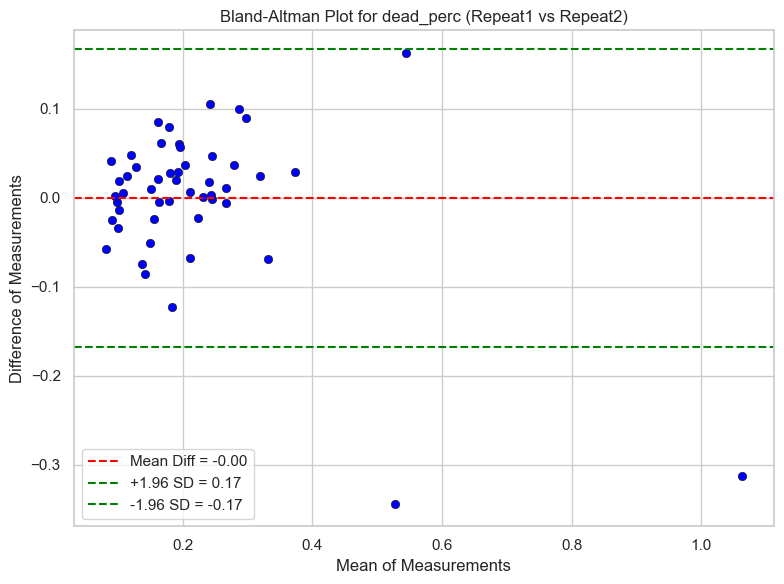

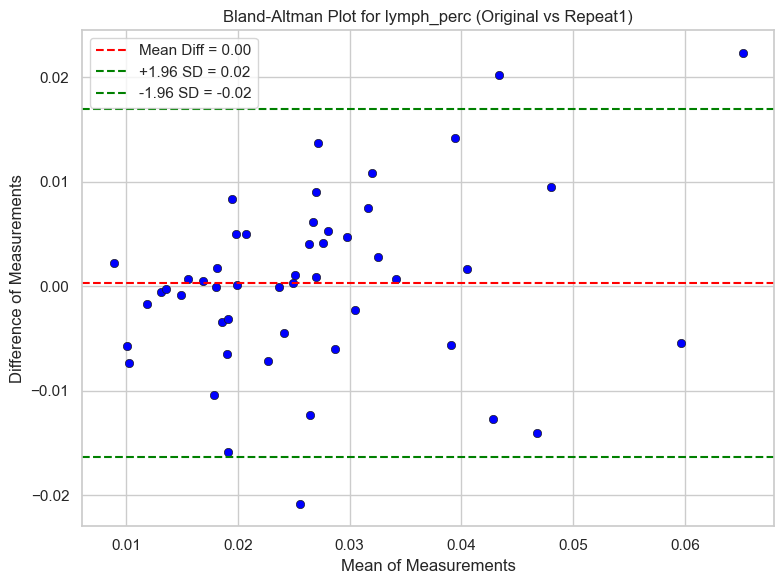

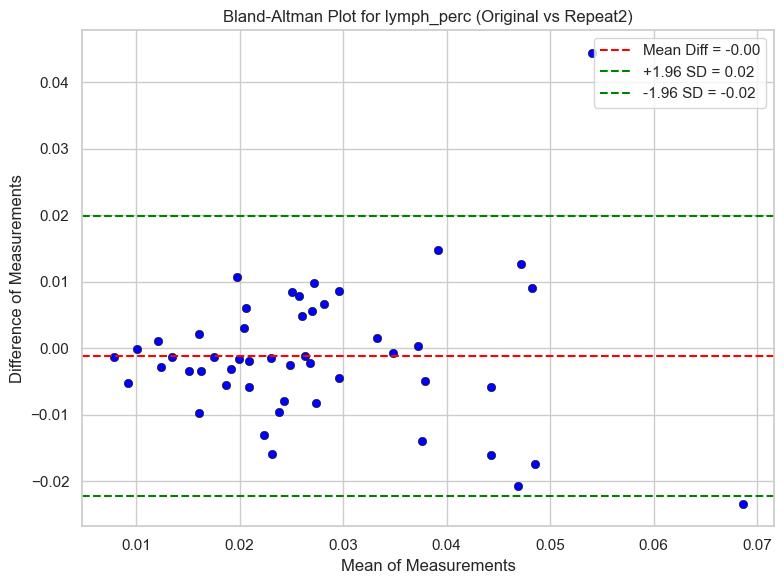

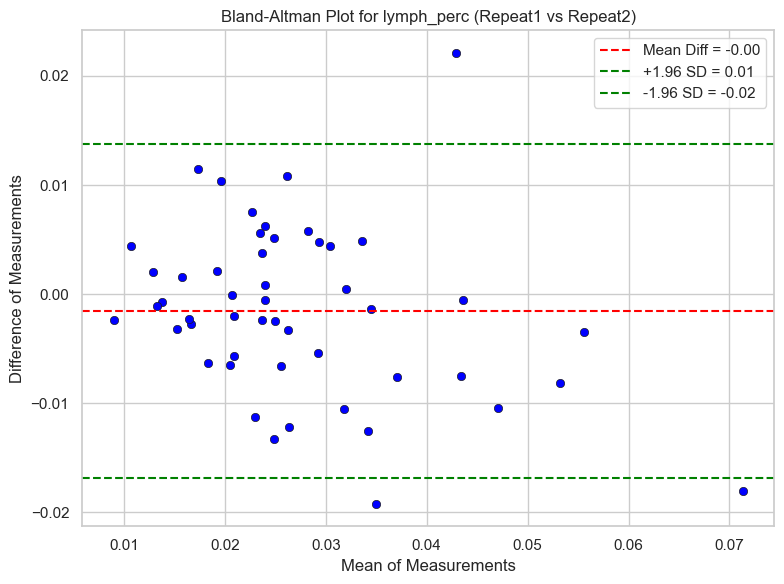

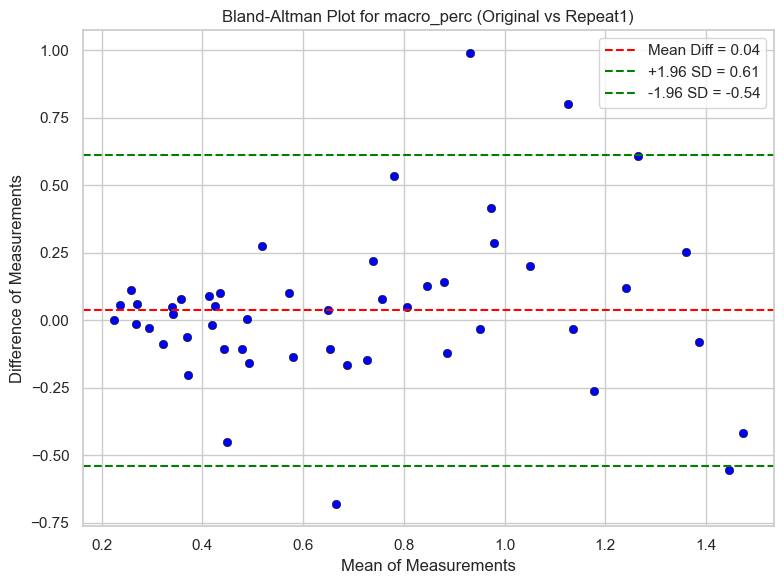

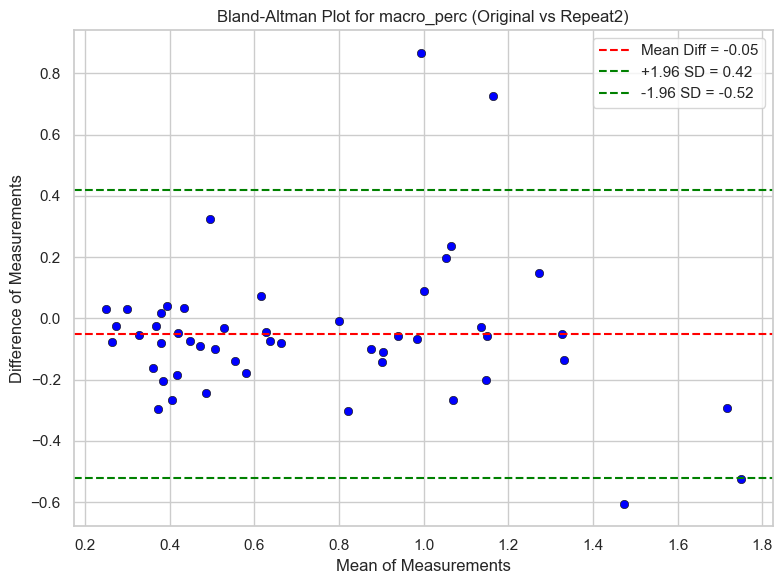

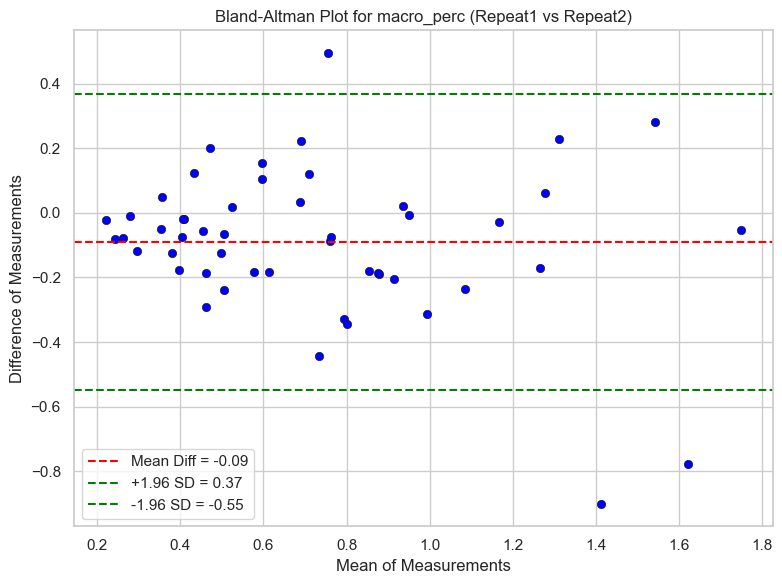

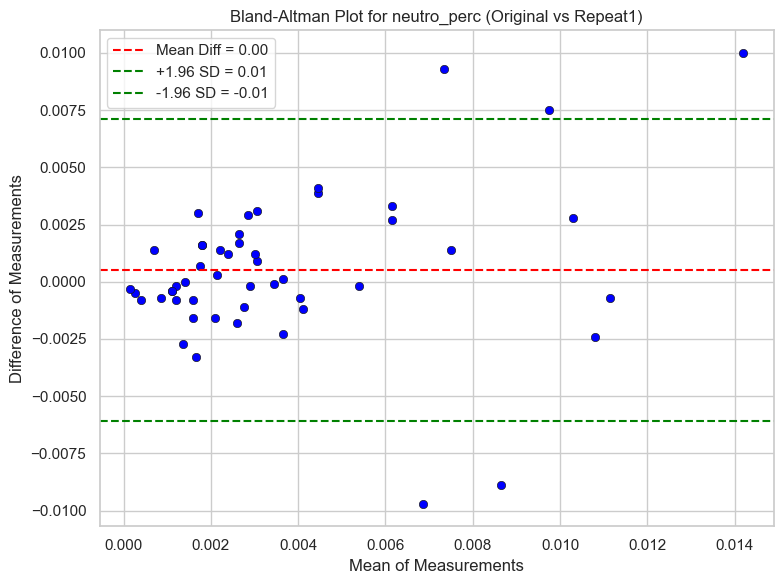

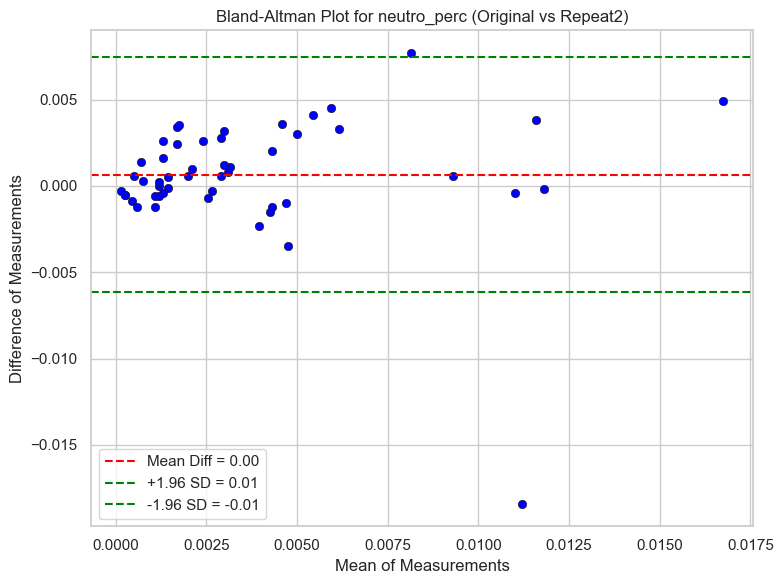

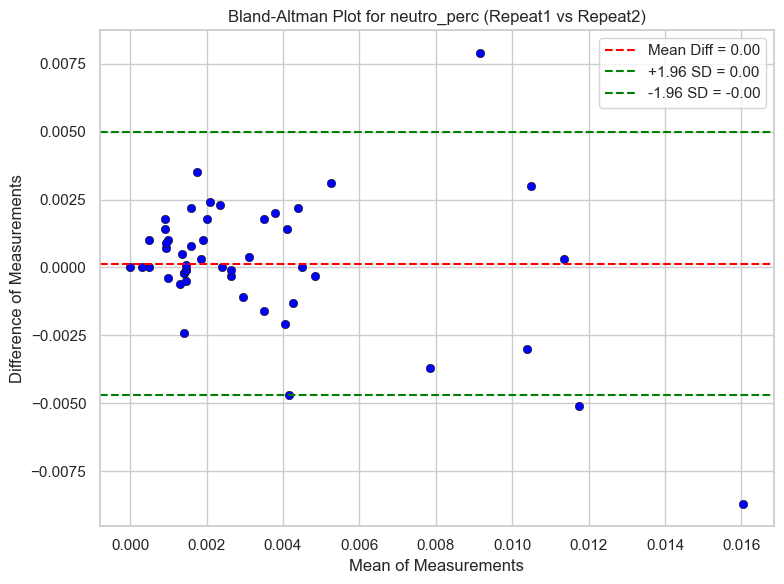

In [11]:

perc_features = [
    'epi_perc',
    'inflam_perc',
    'conn_perc',
    'dead_perc',
    'lymph_perc',
    'macro_perc',
    'neutro_perc'
]


required_columns = ['sample', 'source'] + perc_features
data = data[required_columns]


data_pivot = data.pivot(index='sample', columns='source')

def bland_altman_plot(data1, data2, feature_name, source1, source2):

 
    mean_values = (data1 + data2) / 2
    diff_values = data1 - data2 
    avg_diff = diff_values.mean()
    std_diff = diff_values.std()
    

    loa_upper = avg_diff + 1.96 * std_diff
    loa_lower = avg_diff - 1.96 * std_diff
    
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=mean_values, y=diff_values, color='blue', edgecolor='k')
    
    plt.axhline(avg_diff, color='red', linestyle='--', label=f'Mean Diff = {avg_diff:.2f}')
    plt.axhline(loa_upper, color='green', linestyle='--', label=f'+1.96 SD = {loa_upper:.2f}')
    plt.axhline(loa_lower, color='green', linestyle='--', label=f'-1.96 SD = {loa_lower:.2f}')
    
    plt.xlabel('Mean of Measurements')
    plt.ylabel('Difference of Measurements')
    plt.title(f'Bland-Altman Plot for {feature_name} ({source1} vs {source2})')
    plt.legend()
    plt.tight_layout()
    plt.show()



sources = data['source'].unique()


source_pairs = [('Original', 'Repeat1'), ('Original', 'Repeat2'), ('Repeat1', 'Repeat2')]


for feature in perc_features:
    for source1, source2 in source_pairs:
        try:
            data1 = data_pivot[feature][source1]
            data2 = data_pivot[feature][source2]
            
            valid_indices = data1.dropna().index.intersection(data2.dropna().index)
            data1 = data1.loc[valid_indices]
            data2 = data2.loc[valid_indices]
            
            bland_altman_plot(data1, data2, feature, source1, source2)
        except KeyError as e:
            print(f"Data for {feature} not found for sources {source1} and/or {source2}.")
        except Exception as e:
            print(f"An error occurred while processing {feature} between {source1} and {source2}: {e}")


In [ ]:
import numpy as np
from scipy.spatial import cKDTree
from annoy import AnnoyIndex
from openslide import OpenSlide
import numpy as np
from matplotlib import pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
import joblib
from tiatoolbox.utils.visualization import  overlay_prediction_contours
import matplotlib as mpl
from tiatoolbox.wsicore.wsireader import WSIReader

mpl.rcParams['figure.dpi'] = 300 # for high resolution figure in notebook
plt.rcParams.update({'font.size': 5})
ON_GPU = True

def save_tiles(img_bgr, output_directory):
    height, width, _ = img_bgr.shape
    img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    for y in range(0, height, 1024):
        for x in range(0, width, 1024):
            tile = img[y:y+1024, x:x+1024]
            tile_name = f"tile_{y}_{x}.tif"
            cv2.imwrite(output_directory + '/' + tile_name, tile)

def create_tiles(svs_file, prediction_file,outdir):
    wsi = WSIReader.open(svs_file)
    print("WSI original dimensions: {}".format(wsi.info.slide_dimensions))

    wsi_overview = wsi.slide_thumbnail(resolution=0.25, units="mpp")
    print("WSI overview dimensions: {}".format(wsi_overview.shape))

    wsi_pred_mon = joblib.load(prediction_file)
    import cv2
    
    color_dict = {
    0: ("neoplastic epithelial", (255, 0, 0)), #red
    1: ("Inflammatory", (255, 255, 0)),# yellow
    2: ("Connective", (0, 255, 0)), #Green
    3: ("Dead", (0, 0, 0)), #Black
    4: ("non-neoplastic epithelial", (0, 0, 255)), #Blue
    5: ("epithelial", (128,0,128)), # Purple
    6: ("lymphocyte", (165,42,42)), # Brown
    7: ("macrophage", (255, 0, 255)), # Magenta/Fuchsia
    8: ("neutrophils", (255, 165, 0)) # Orange  
    }

    # Create the overlay image
    overlaid_predictions = overlay_prediction_contours(
        canvas=wsi_overview,
        inst_dict=combined_dict,
        draw_dot=False,
        type_colours=color_dict,
        line_thickness=4,
    )

    save_tiles(wsi_pred_pan,pan_color_dict, "../pan_tiles")
    save_tiles(wsi_pred_mon,mon_color_dict, "../mon_tiles")